In [1]:
require(data.table)
require(dada2)
require(phyloseq)
require(genefilter)
require(ggplot2)
require(RColorBrewer)
require(vegan)
require(DESeq2)
options(repr.plot.width=20, repr.plot.height=15)

Loading required package: data.table

Loading required package: dada2

Loading required package: Rcpp

Loading required package: phyloseq

Loading required package: genefilter

Loading required package: ggplot2

Loading required package: RColorBrewer

Loading required package: vegan

Loading required package: permute

Loading required package: lattice

This is vegan 2.5-7

Loading required package: DESeq2

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, a

In [6]:
meta=fread("~/Documents/DE/DE_16S/DE16S_allmeta.csv")
asv_all=fread("~/Documents/DE/DE_16S/ASVs/Run123_ASV_nochim.csv")
taxa=read.csv("~/Documents/DE/DE_16S/ASVs/Run123_taxa.csv", header=TRUE, row.names=1)

In [7]:
#fix rownames
rows=as.vector(asv_all[,1])
asv_all=asv_all[,-1]
asv_all=apply(asv_all, 2, as.numeric)
row.names(asv_all)=rows$V1

In [8]:
#negative controls 
negs=meta[meta$Experiment=="Negative",]
negcounts=asv_all[row.names(asv_all) %in% negs$UniqueID,]
negotucounts=negcounts[,colSums(negcounts)>0]
negotus=colnames(negotucounts)

In [9]:
#pull out the lab dilution effect samples
meta_de=meta[meta$Experiment=="Lab18",]
asv_de=asv_all[rownames(asv_all) %in% meta_de$UniqueID,]
asv_de=asv_de[,colSums(asv_de)>0]
taxa_de=taxa[rownames(taxa)%in% colnames(asv_de),]

In [10]:
taxa_de=as.matrix(taxa_de)
meta_de=as.data.frame(meta_de)
row.names(meta_de)=meta_de$UniqueID

In [11]:
class(asv_de)

[1] "matrix" "array"

In [12]:
class(taxa_de)

[1] "matrix" "array"

In [13]:
asv_de_dummy=as.data.frame((asv_de))
asv_de_dummy$dummy=1
taxa_ded=as.data.frame(t(taxa_de))
taxa_ded$dummy=1
taxa_ded=as.matrix(t(taxa_ded))

In [17]:
OTUd = otu_table(as.matrix(t(asv_de_dummy)), taxa_are_rows = TRUE)
OTUd=transform_sample_counts(OTUd, function(x) 1E6 * x/sum(x))
TAXd = tax_table(taxa_ded)    
DEd = phyloseq(OTUd, TAXd, SAMP)

In [18]:
DEd

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 7295 taxa and 100 samples ]
sample_data() Sample Data:       [ 100 samples by 17 sample variables ]
tax_table()   Taxonomy Table:    [ 7295 taxa by 6 taxonomic ranks ]

In [22]:
OTU = otu_table(t(asv_de), taxa_are_rows = TRUE)
TAX = tax_table(taxa_de)
SAMP=sample_data(meta_de)

In [23]:
OTU=transform_sample_counts(OTU, function(x) 1E6 * x/sum(x))

In [24]:
DE = phyloseq(OTU, TAX, SAMP)

In [25]:
DE.ord = ordinate(DE, "NMDS", "bray", trymax=1000)

Square root transformation
Wisconsin double standardization
Run 0 stress 0.1906192 
Run 1 stress 0.2212664 
Run 2 stress 0.2166675 
Run 3 stress 0.2169284 
Run 4 stress 0.2150875 
Run 5 stress 0.1905766 
... New best solution
... Procrustes: rmse 0.003280473  max resid 0.02275535 
Run 6 stress 0.2069995 
Run 7 stress 0.2141713 
Run 8 stress 0.2111817 
Run 9 stress 0.1985872 
Run 10 stress 0.2264821 
Run 11 stress 0.190576 
... New best solution
... Procrustes: rmse 0.0006666276  max resid 0.006040752 
... Similar to previous best
Run 12 stress 0.2111924 
Run 13 stress 0.1906192 
... Procrustes: rmse 0.003200659  max resid 0.02271753 
Run 14 stress 0.2397 
Run 15 stress 0.1906204 
... Procrustes: rmse 0.003250126  max resid 0.02267943 
Run 16 stress 0.2021803 
Run 17 stress 0.2130889 
Run 18 stress 0.2289808 
Run 19 stress 0.1986094 
Run 20 stress 0.2105376 
*** Solution reached


In [21]:
DE.ord = ordinate(DE, "NMDS", "jaccard", trymax=1000)

Square root transformation
Wisconsin double standardization
Run 0 stress 0.1906192 
Run 1 stress 0.1906192 
... New best solution
... Procrustes: rmse 2.647714e-06  max resid 1.171034e-05 
... Similar to previous best
Run 2 stress 0.2014525 
Run 3 stress 0.1905765 
... New best solution
... Procrustes: rmse 0.003267537  max resid 0.02274957 
Run 4 stress 0.2381951 
Run 5 stress 0.200893 
Run 6 stress 0.2066893 
Run 7 stress 0.2412504 
Run 8 stress 0.2014815 
Run 9 stress 0.2316273 
Run 10 stress 0.1906204 
... Procrustes: rmse 0.003202153  max resid 0.02271522 
Run 11 stress 0.2074841 
Run 12 stress 0.2074237 
Run 13 stress 0.1906192 
... Procrustes: rmse 0.00326685  max resid 0.02275245 
Run 14 stress 0.2280375 
Run 15 stress 0.1906195 
... Procrustes: rmse 0.003742315  max resid 0.02723303 
Run 16 stress 0.2124897 
Run 17 stress 0.19653 
Run 18 stress 0.2346436 
Run 19 stress 0.2345152 
Run 20 stress 0.2209266 
Run 21 stress 0.1985872 
Run 22 stress 0.2177512 
Run 23 stress 0.1906204

Warning message in postMDS(out$points, dis, plot = max(0, plot - 1), ...):
“skipping half-change scaling: too few points below threshold”


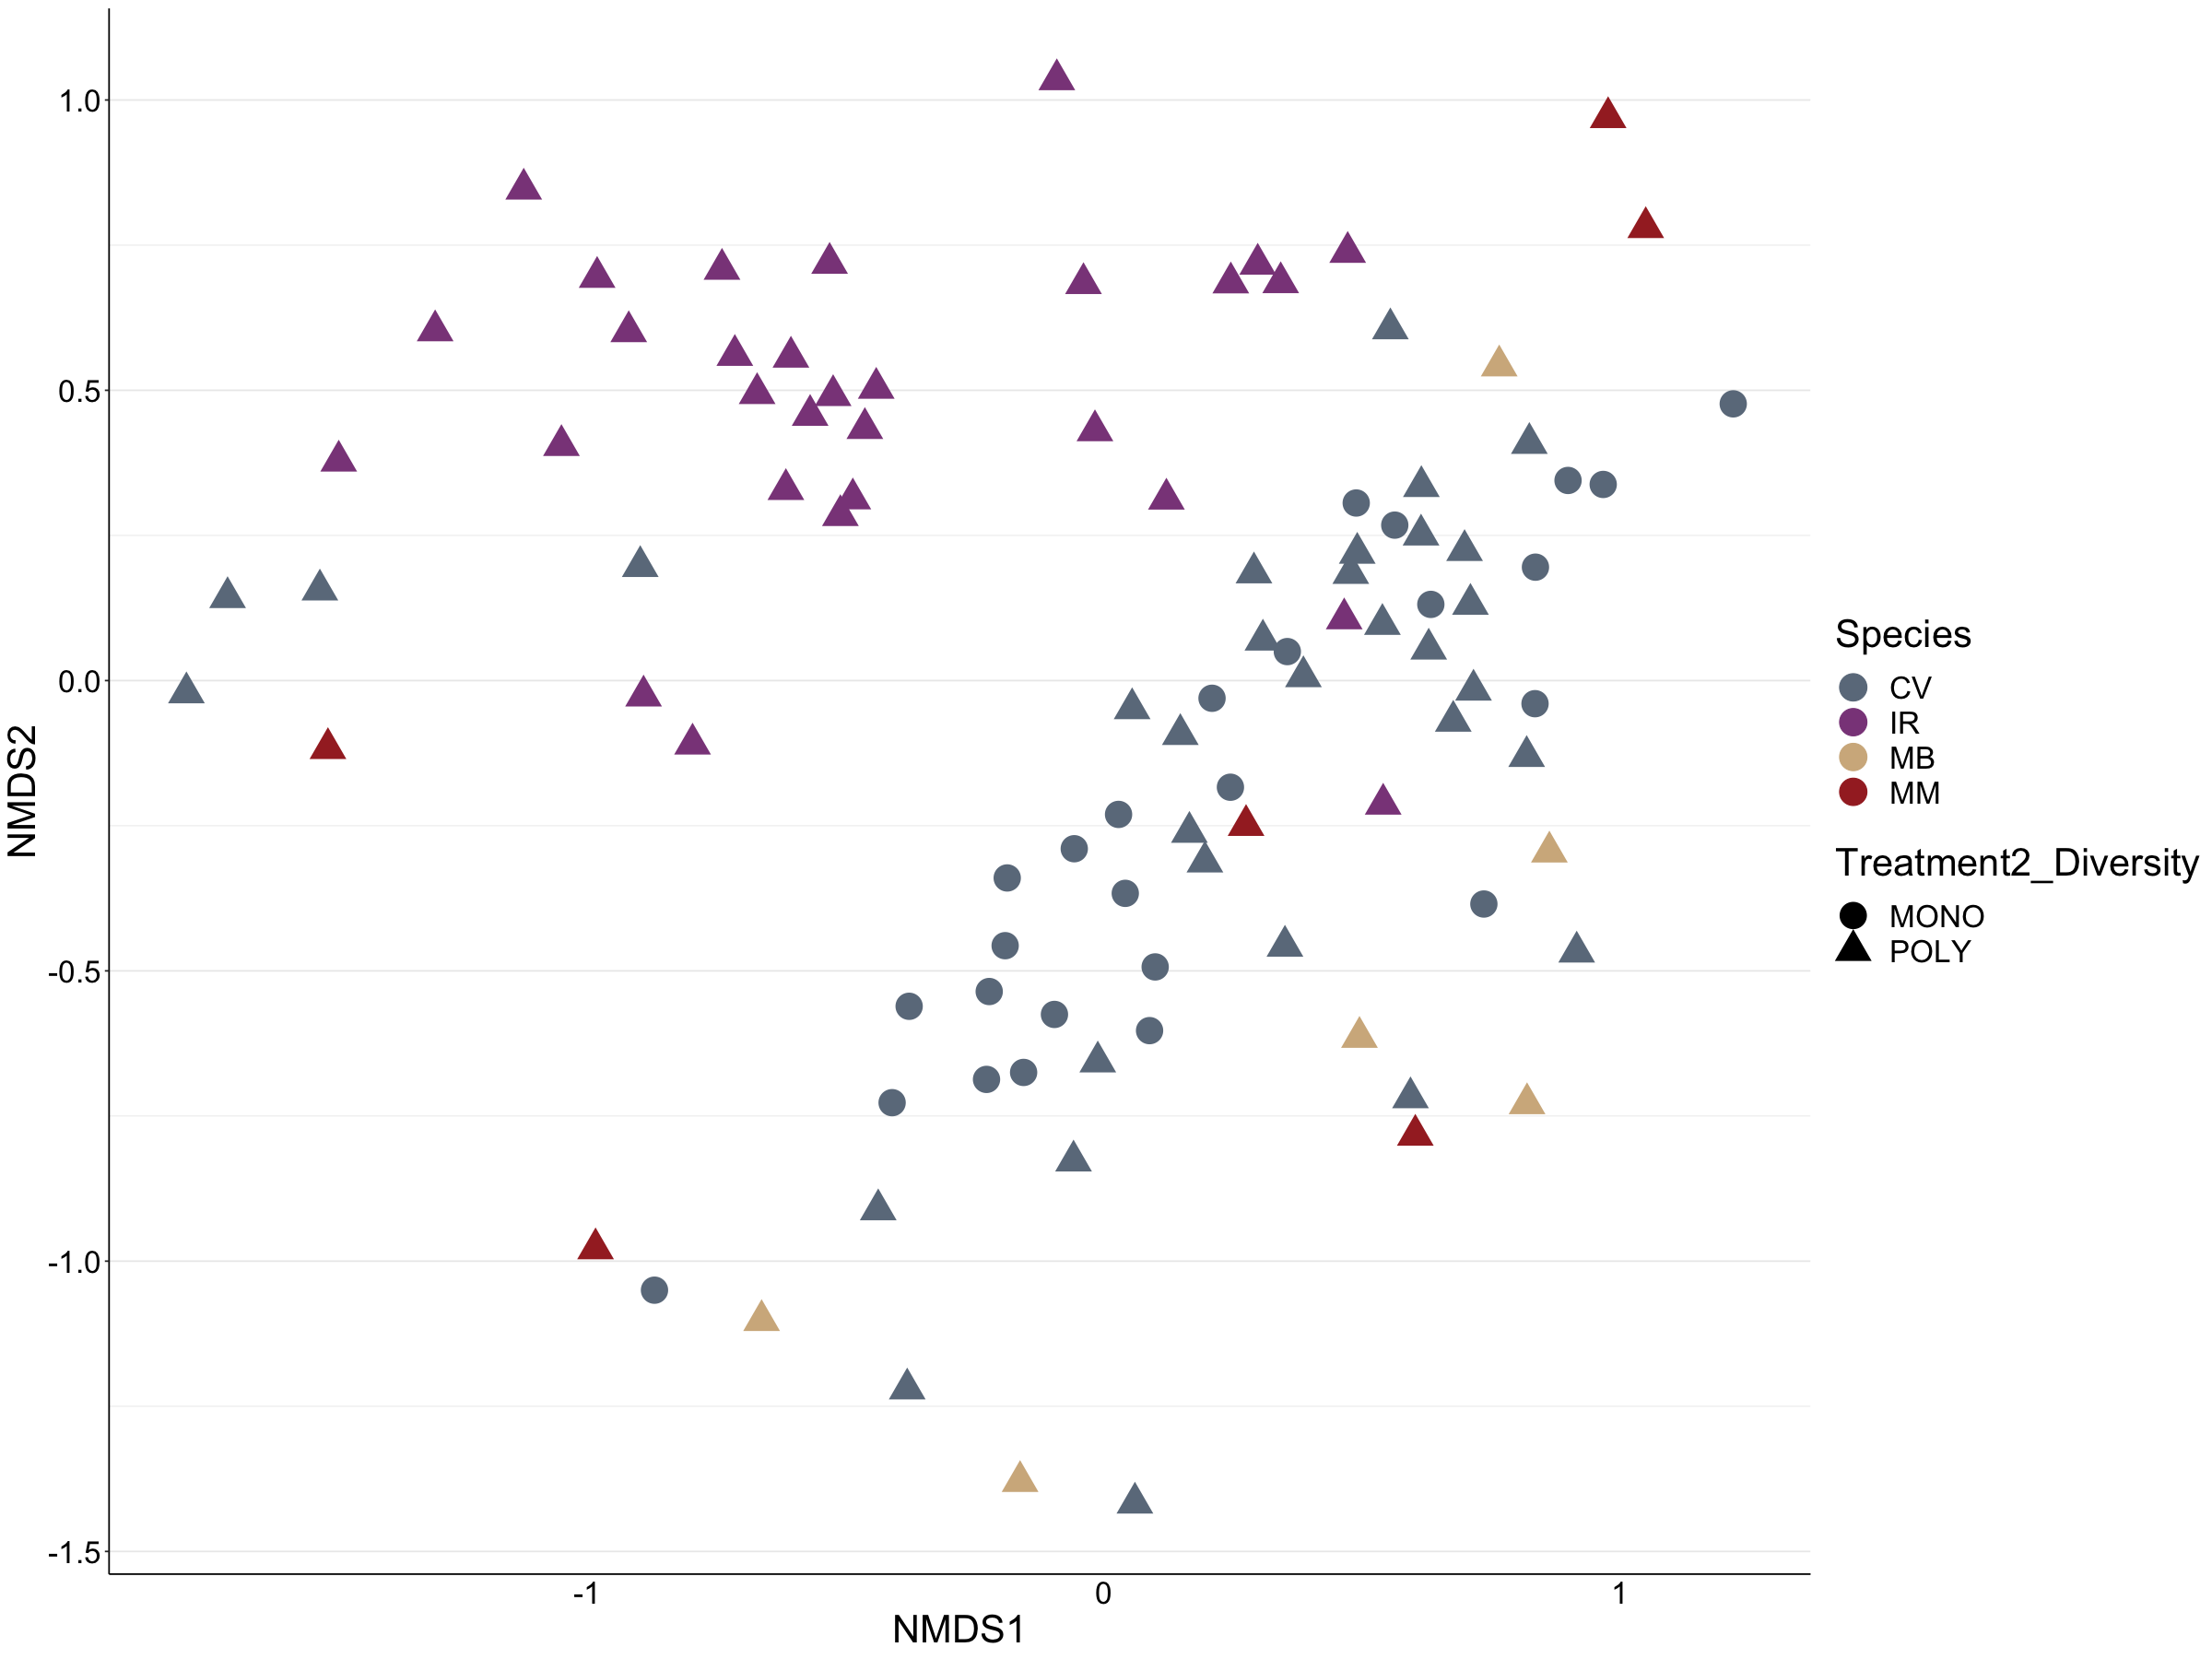

In [39]:
plot_ordination(DE, DE.ord, type="samples", color="Species", shape="Treatment2_Diversity")+ 
#facet_wrap("Species")+
#geom_polygon(aes(fill=Phase_1_DO))+ 
scale_color_manual(values=c("slategray4", "orchid4", "tan", "brown"))+
geom_point(size=8)+
theme_bw()+
#geom_text(mapping = aes(label = Number), size = 10) +
 theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=25))

In [40]:
ggsave(width=12, height=8, file="~/Documents/DE/DE_16S/DE18nMDS.pdf")

In [1]:
plot_ordination(DE, DE.ord, type="samples", color="Species", shape="Treatment2_Diversity")+ 
#facet_wrap("Species")+
#geom_polygon(aes(fill=Phase_1_DO))+ 
geom_point(size=10)+
theme_bw()+
#geom_text(mapping = aes(label = Number), size = 10) +
 theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=50))

ERROR: Error in plot_ordination(DE, DE.ord, type = "samples", color = "Species", : could not find function "plot_ordination"


In [163]:
df = as(sample_data(DE), "data.frame")
d = dist(DE)
DEadonis = adonis2(d ~ Treatment1_Density+ Species/Treatment2_Diversity + Color_Bucket, df, permutations=999)
DEadonis

ERROR: Error in as.vector(data): no method for coercing this S4 class to a vector


In [17]:
CV = subset_samples(DE, Species%in%c("CV"))

In [25]:
CVdf = as(sample_data(CV), "data.frame")
CVd = distance(CV, "bray")
CVadonis = adonis2(CVd ~  Treatment2_Diversity*Treatment1_Density/Color_Bucket , CVdf, permutations=999)
CVadonis

Df SumOfSqs   R2        
Treatment2_Diversity                                  1  0.4199351 0.02590109
Treatment1_Density                                    1  0.3520760 0.02171562
Treatment2_Diversity:Treatment1_Density               1  0.1946023 0.01200283
Treatment2_Diversity:Treatment1_Density:Color_Bucket  8  2.5334602 0.15626079
Residual                                             46 12.7129527 0.78411967
Total                                                57 16.2130262 1.00000000
                                                     F         Pr(>F)
Treatment2_Diversity                                 1.5194750 0.109 
Treatment1_Density                                   1.2739364 0.217 
Treatment2_Diversity:Treatment1_Density              0.7041404 0.742 
Treatment2_Diversity:Treatment1_Density:Color_Bucket 1.1458704 0.190 
Residual                                                    NA    NA 
Total                                                       NA    NA

In [ ]:
CV_mono = subset_samples(DE, Species%in%c("CV")& Treatment2_Diversity %in%c("MONO"))


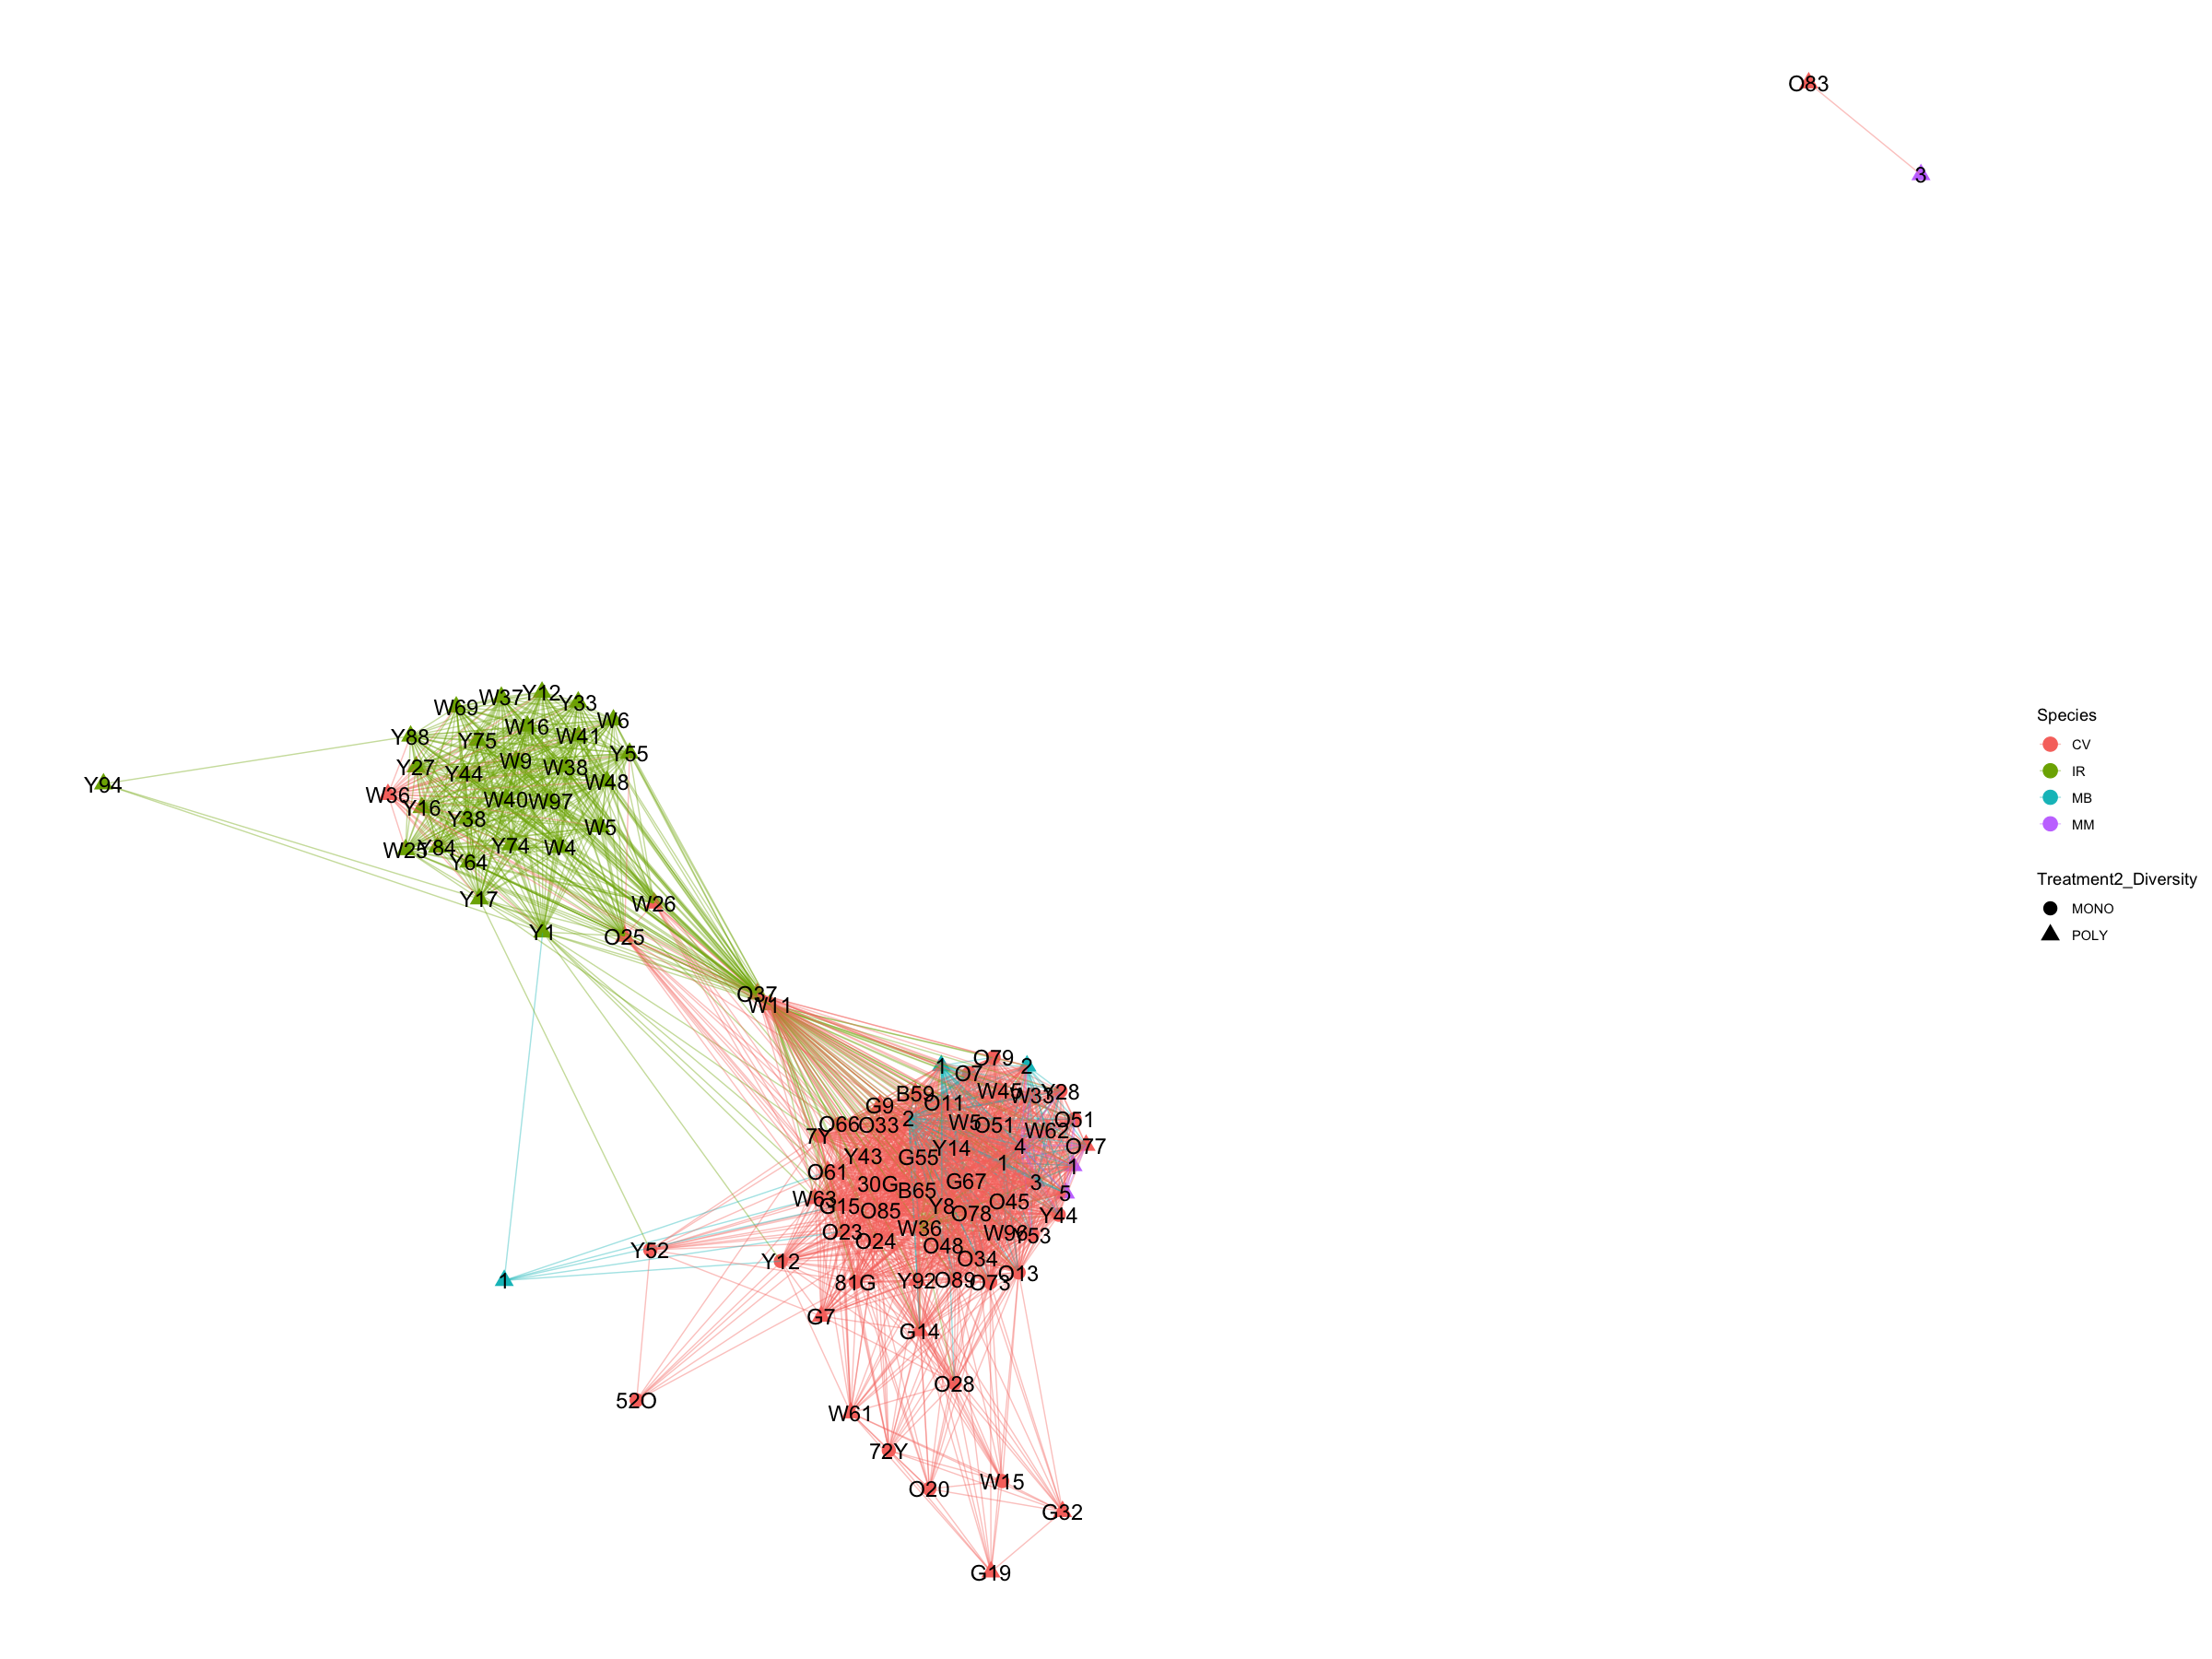

In [52]:
denw = make_network(DE, type = "samples", distance = "bray", max.dist = 0.85)
plot_network(denw, DE, color = "Species", shape = "Treatment2_Diversity",  line_weight = 0.4, 
    label = NULL)+
geom_text(mapping = aes(label = Number), size = 5) 

Look at the lower outlier cluster. Look at infections. Look at growth relationships with outlier oysters. 
Also start with the growth data, do the better growers have a different microbiome? 
Regress wet weight against shell length. and starting size to growth. 

In [160]:
sample_data(DE)

V1  UniqueID                  Experiment Year Site
2018__HIGH_MONO_HM1O73_CV 116 2018__HIGH_MONO_HM1O73_CV Lab18      2018     
2018__HIGH_MONO_HM1W15_CV 113 2018__HIGH_MONO_HM1W15_CV Lab18      2018     
2018__HIGH_MONO_HM1W33_CV 114 2018__HIGH_MONO_HM1W33_CV Lab18      2018     
2018__HIGH_MONO_HM1W96_CV 115 2018__HIGH_MONO_HM1W96_CV Lab18      2018     
2018__HIGH_MONO_HM4Y44_CV 121 2018__HIGH_MONO_HM4Y44_CV Lab18      2018     
2018__HIGH_MONO_HM4Y53_CV 122 2018__HIGH_MONO_HM4Y53_CV Lab18      2018     
2018__HIGH_MONO_HM8O20_CV 123 2018__HIGH_MONO_HM8O20_CV Lab18      2018     
2018__HIGH_MONO_HM8O34_CV 124 2018__HIGH_MONO_HM8O34_CV Lab18      2018     
2018__HIGH_MONO_HM8O66_CV 125 2018__HIGH_MONO_HM8O66_CV Lab18      2018     
2018__HIGH_MONO_HM8Y28_CV 126 2018__HIGH_MONO_HM8Y28_CV Lab18      2018     
2018__HIGH_MONO_HM8Y52_CV 127 2018__HIGH_MONO_HM8Y52_CV Lab18      2018     
2018__HIGH_POLY_HP1W26_CV 129 2018__HIGH_POLY_HP1W26_CV Lab18      2018     
2018__HIGH_POLY_HP1W5_CV  128 2018__HIGH_POLY_HP1W5_CV  Lab18      2018     
2018__HIGH_POLY_HP1W62_CV 200 2018__HIGH_POLY_HP1W62_CV Lab18      2018     
2018__HIGH_POLY_HP1W63_CV 130 2018__HIGH_POLY_HP1W63_CV Lab18      2018     
2018__HIGH_POLY_HP1Y33_IR 131 2018__HIGH_POLY_HP1Y33_IR Lab18      2018     
2018__HIGH_POLY_HP1Y55_IR 132 2018__HIGH_POLY_HP1Y55_IR Lab18      2018     
2018__HIGH_POLY_HP1Y64_IR 133 2018__HIGH_POLY_HP1Y64_IR Lab18      2018     
2018__HIGH_POLY_HP1Y75_IR 134 2018__HIGH_POLY_HP1Y75_IR Lab18      2018     
2018__HIGH_POLY_HP1Y84_IR 135 2018__HIGH_POLY_HP1Y84_IR Lab18      2018     
2018__HIGH_POLY_HP3B59_CV 136 2018__HIGH_POLY_HP3B59_CV Lab18      2018     
2018__HIGH_POLY_HP3B65_CV 137 2018__HIGH_POLY_HP3B65_CV Lab18      2018     
2018__HIGH_POLY_HP3W36_CV 138 2018__HIGH_POLY_HP3W36_CV Lab18      2018     
2018__HIGH_POLY_HP3W36_IR 142 2018__HIGH_POLY_HP3W36_IR Lab18      2018     
2018__HIGH_POLY_HP3W37_IR 143 2018__HIGH_POLY_HP3W37_IR Lab18      2018     
2018__HIGH_POLY_HP3W4_IR  140 2018__HIGH_POLY_HP3W4_IR  Lab18      2018     
2018__HIGH_POLY_HP3W40_IR 144 2018__HIGH_POLY_HP3W40_IR Lab18      2018     
2018__HIGH_POLY_HP3W45_CV 202 2018__HIGH_POLY_HP3W45_CV Lab18      2018     
2018__HIGH_POLY_HP3W61_CV 139 2018__HIGH_POLY_HP3W61_CV Lab18      2018     
2018__HIGH_POLY_HP3W9_IR  141 2018__HIGH_POLY_HP3W9_IR  Lab18      2018     
⋮                         ⋮   ⋮                         ⋮          ⋮    ⋮   
2018__LOW_POLY_LP51_MB    215 2018__LOW_POLY_LP51_MB    Lab18      2018     
2018__LOW_POLY_LP52_MB    213 2018__LOW_POLY_LP52_MB    Lab18      2018     
2018__LOW_POLY_LP53_MM    188 2018__LOW_POLY_LP53_MM    Lab18      2018     
2018__LOW_POLY_LP5G15_CV  182 2018__LOW_POLY_LP5G15_CV  Lab18      2018     
2018__LOW_POLY_LP5G9_CV   206 2018__LOW_POLY_LP5G9_CV   Lab18      2018     
2018__LOW_POLY_LP5O45_CV  207 2018__LOW_POLY_LP5O45_CV  Lab18      2018     
2018__LOW_POLY_LP5O51_CV  210 2018__LOW_POLY_LP5O51_CV  Lab18      2018     
2018__LOW_POLY_LP5O78_CV  208 2018__LOW_POLY_LP5O78_CV  Lab18      2018     
2018__LOW_POLY_LP5O83_CV  180 2018__LOW_POLY_LP5O83_CV  Lab18      2018     
2018__LOW_POLY_LP5W11_IR  184 2018__LOW_POLY_LP5W11_IR  Lab18      2018     
2018__LOW_POLY_LP5W25_IR  185 2018__LOW_POLY_LP5W25_IR  Lab18      2018     
2018__LOW_POLY_LP5W41_IR  186 2018__LOW_POLY_LP5W41_IR  Lab18      2018     
2018__LOW_POLY_LP5W48_IR  187 2018__LOW_POLY_LP5W48_IR  Lab18      2018     
2018__LOW_POLY_LP5W5_IR   183 2018__LOW_POLY_LP5W5_IR   Lab18      2018     
2018__LOW_POLY_LP5Y92_CV  181 2018__LOW_POLY_LP5Y92_CV  Lab18      2018     
2018__LOW_POLY_LP71_MB    217 2018__LOW_POLY_LP71_MB    Lab18      2018     
2018__LOW_POLY_LP72_MB    211 2018__LOW_POLY_LP72_MB    Lab18      2018     
2018__LOW_POLY_LP73_MB    212 2018__LOW_POLY_LP73_MB    Lab18      2018     
2018__LOW_POLY_LP74_MM    214 2018__LOW_POLY_LP74_MM    Lab18      2018     
2018__LOW_POLY_LP75_MM    198 2018__LOW_POLY_LP75_MM    Lab18      2018     
2018__LOW_POLY_LP7O11_

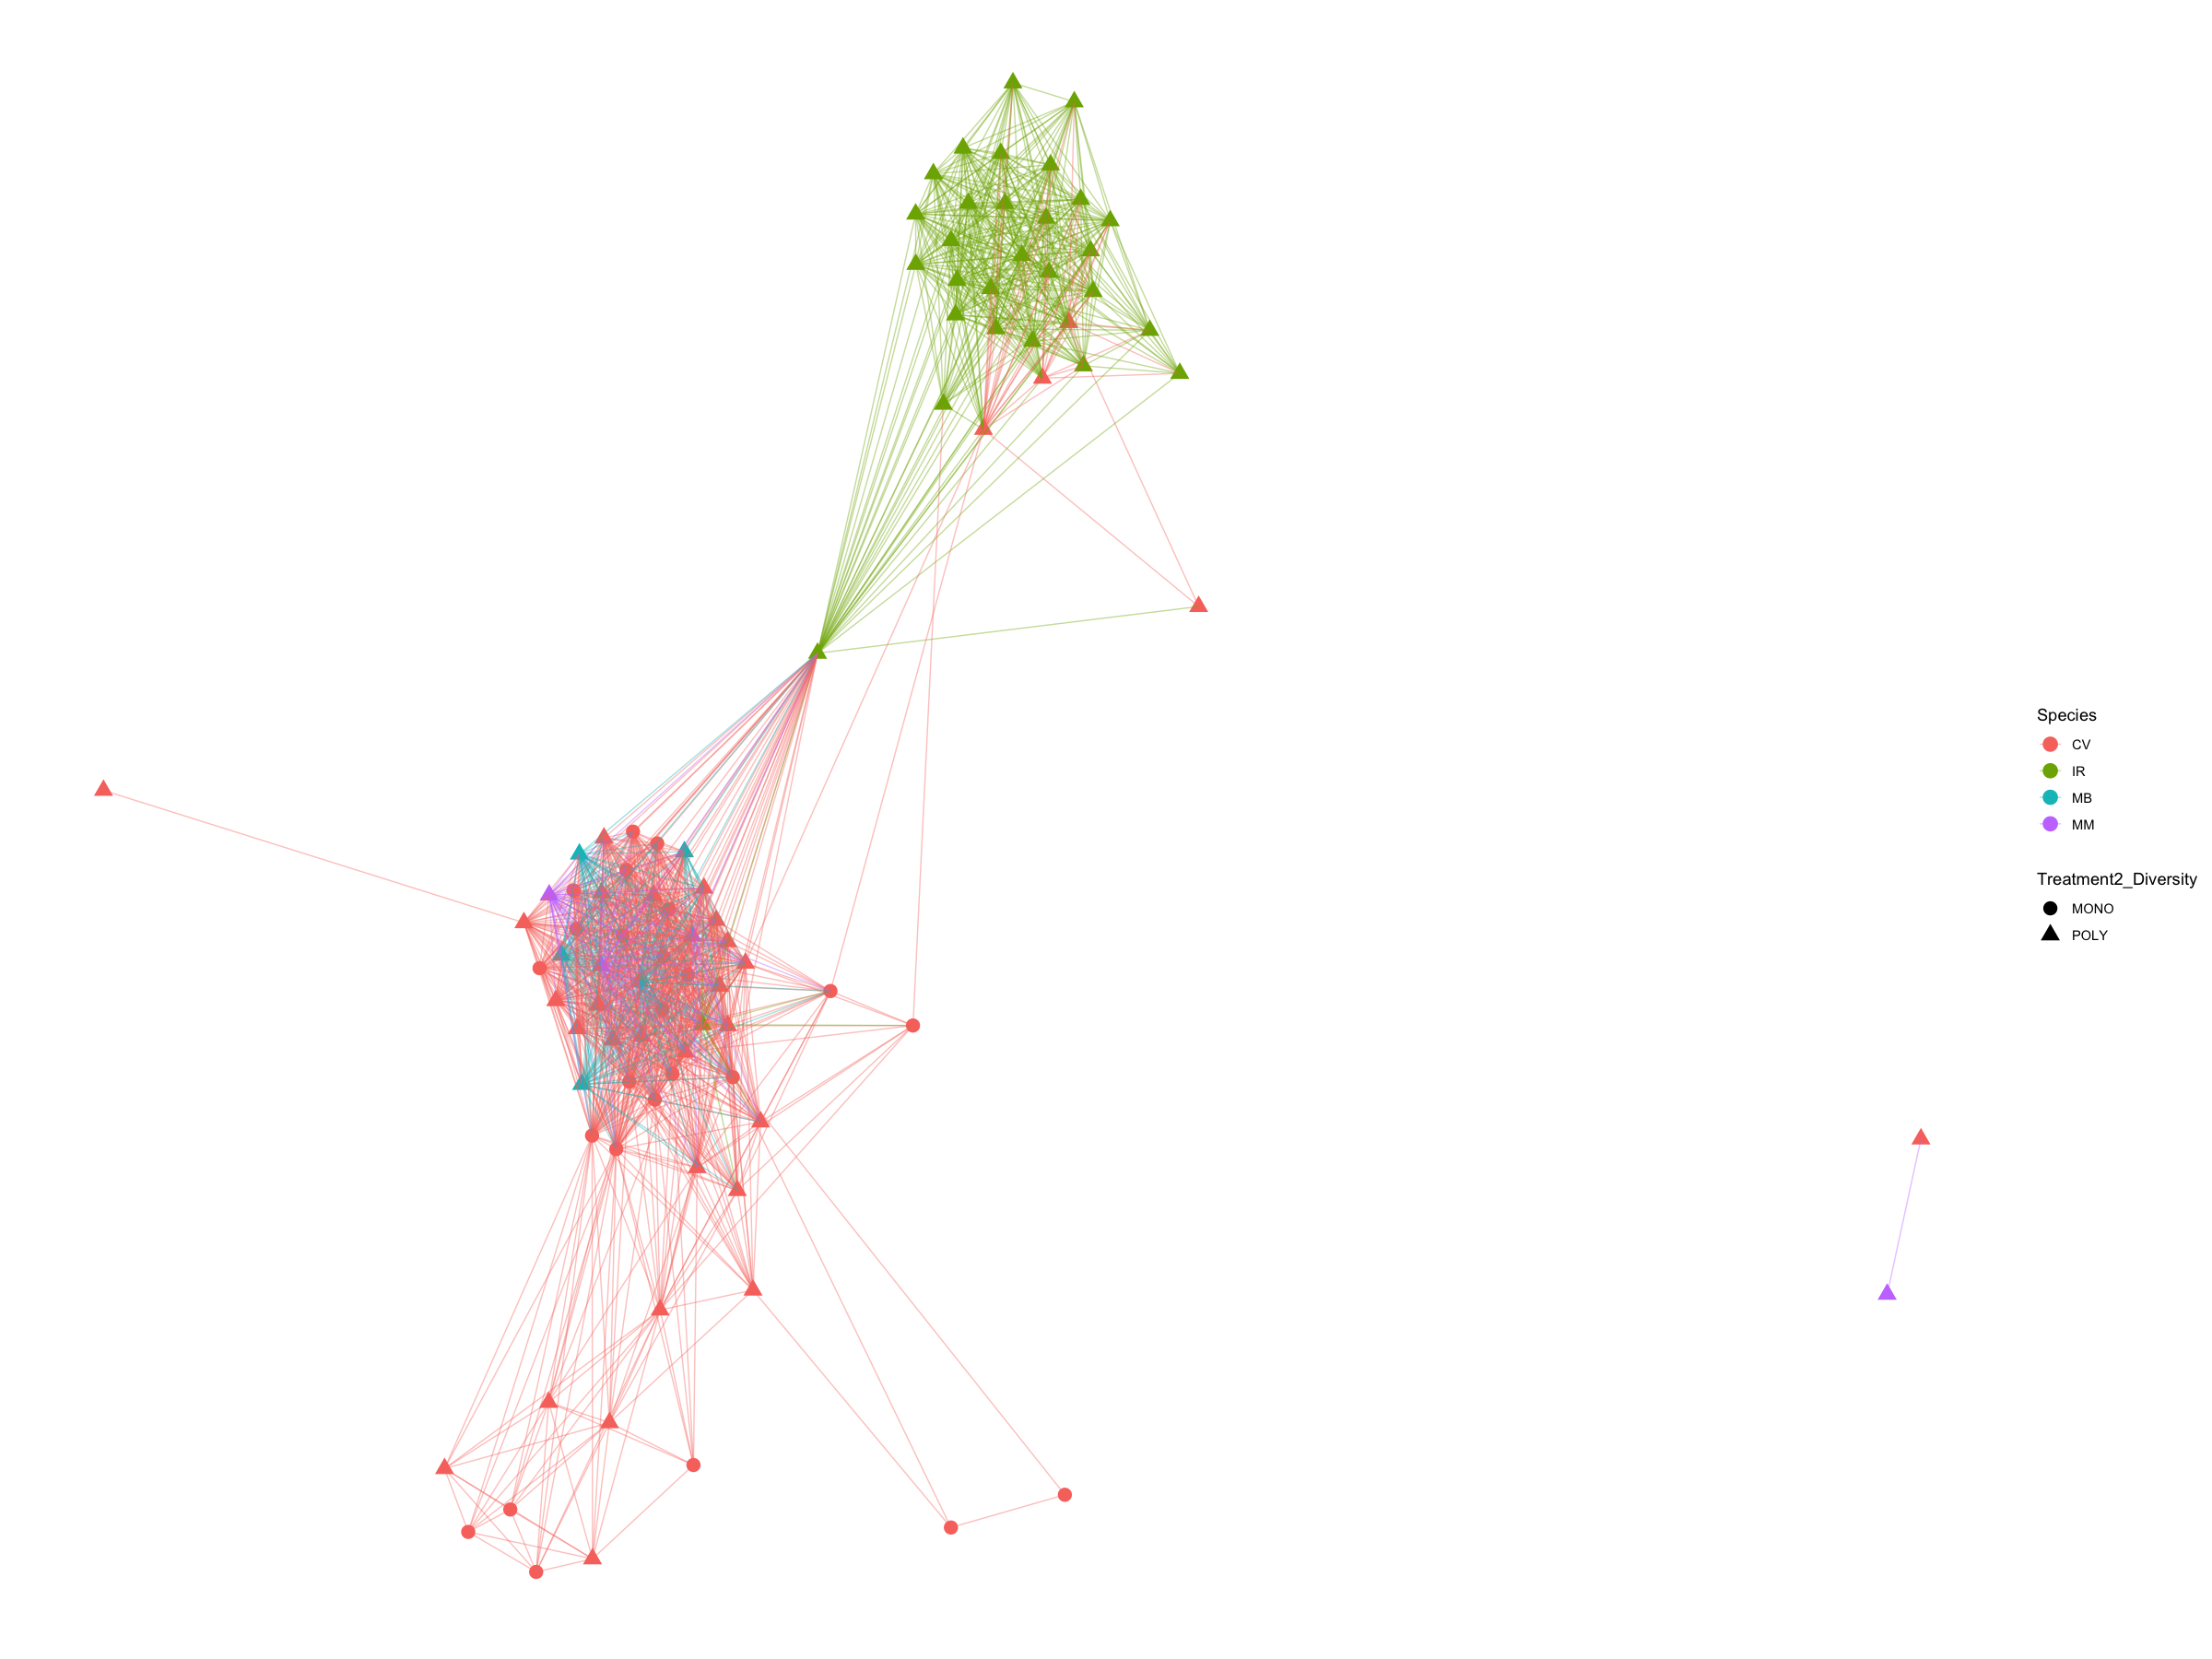

In [40]:
denw = make_network(DE, type = "samples", distance = "jaccard", max.dist = 0.85)
plot_network(denw, DE, color = "Species", shape = "Treatment2_Diversity", line_weight = 0.4, 
    label = NULL)

So either way there are basiclaly 4 oysters that cluster with the mussels. they are all in the polyculture treatments. O25, O37, WW26, W36

## Dominant classes?

In [114]:
#What are dominant otus
#make into percents
OTUp=transform_sample_counts(OTU, function(x) 100 * x/sum(x))
DEp = phyloseq(OTUp, TAX, SAMP)

In [116]:
DEp100 = prune_taxa(names(sort(taxa_sums(DEp),TRUE)[1:100]), DEp)

In [135]:
DEp100

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 100 taxa and 100 samples ]
sample_data() Sample Data:       [ 100 samples by 17 sample variables ]
tax_table()   Taxonomy Table:    [ 100 taxa by 6 taxonomic ranks ]

In [155]:
mycolors= colorRampPalette(brewer.pal(6, "Dark2"))(19)

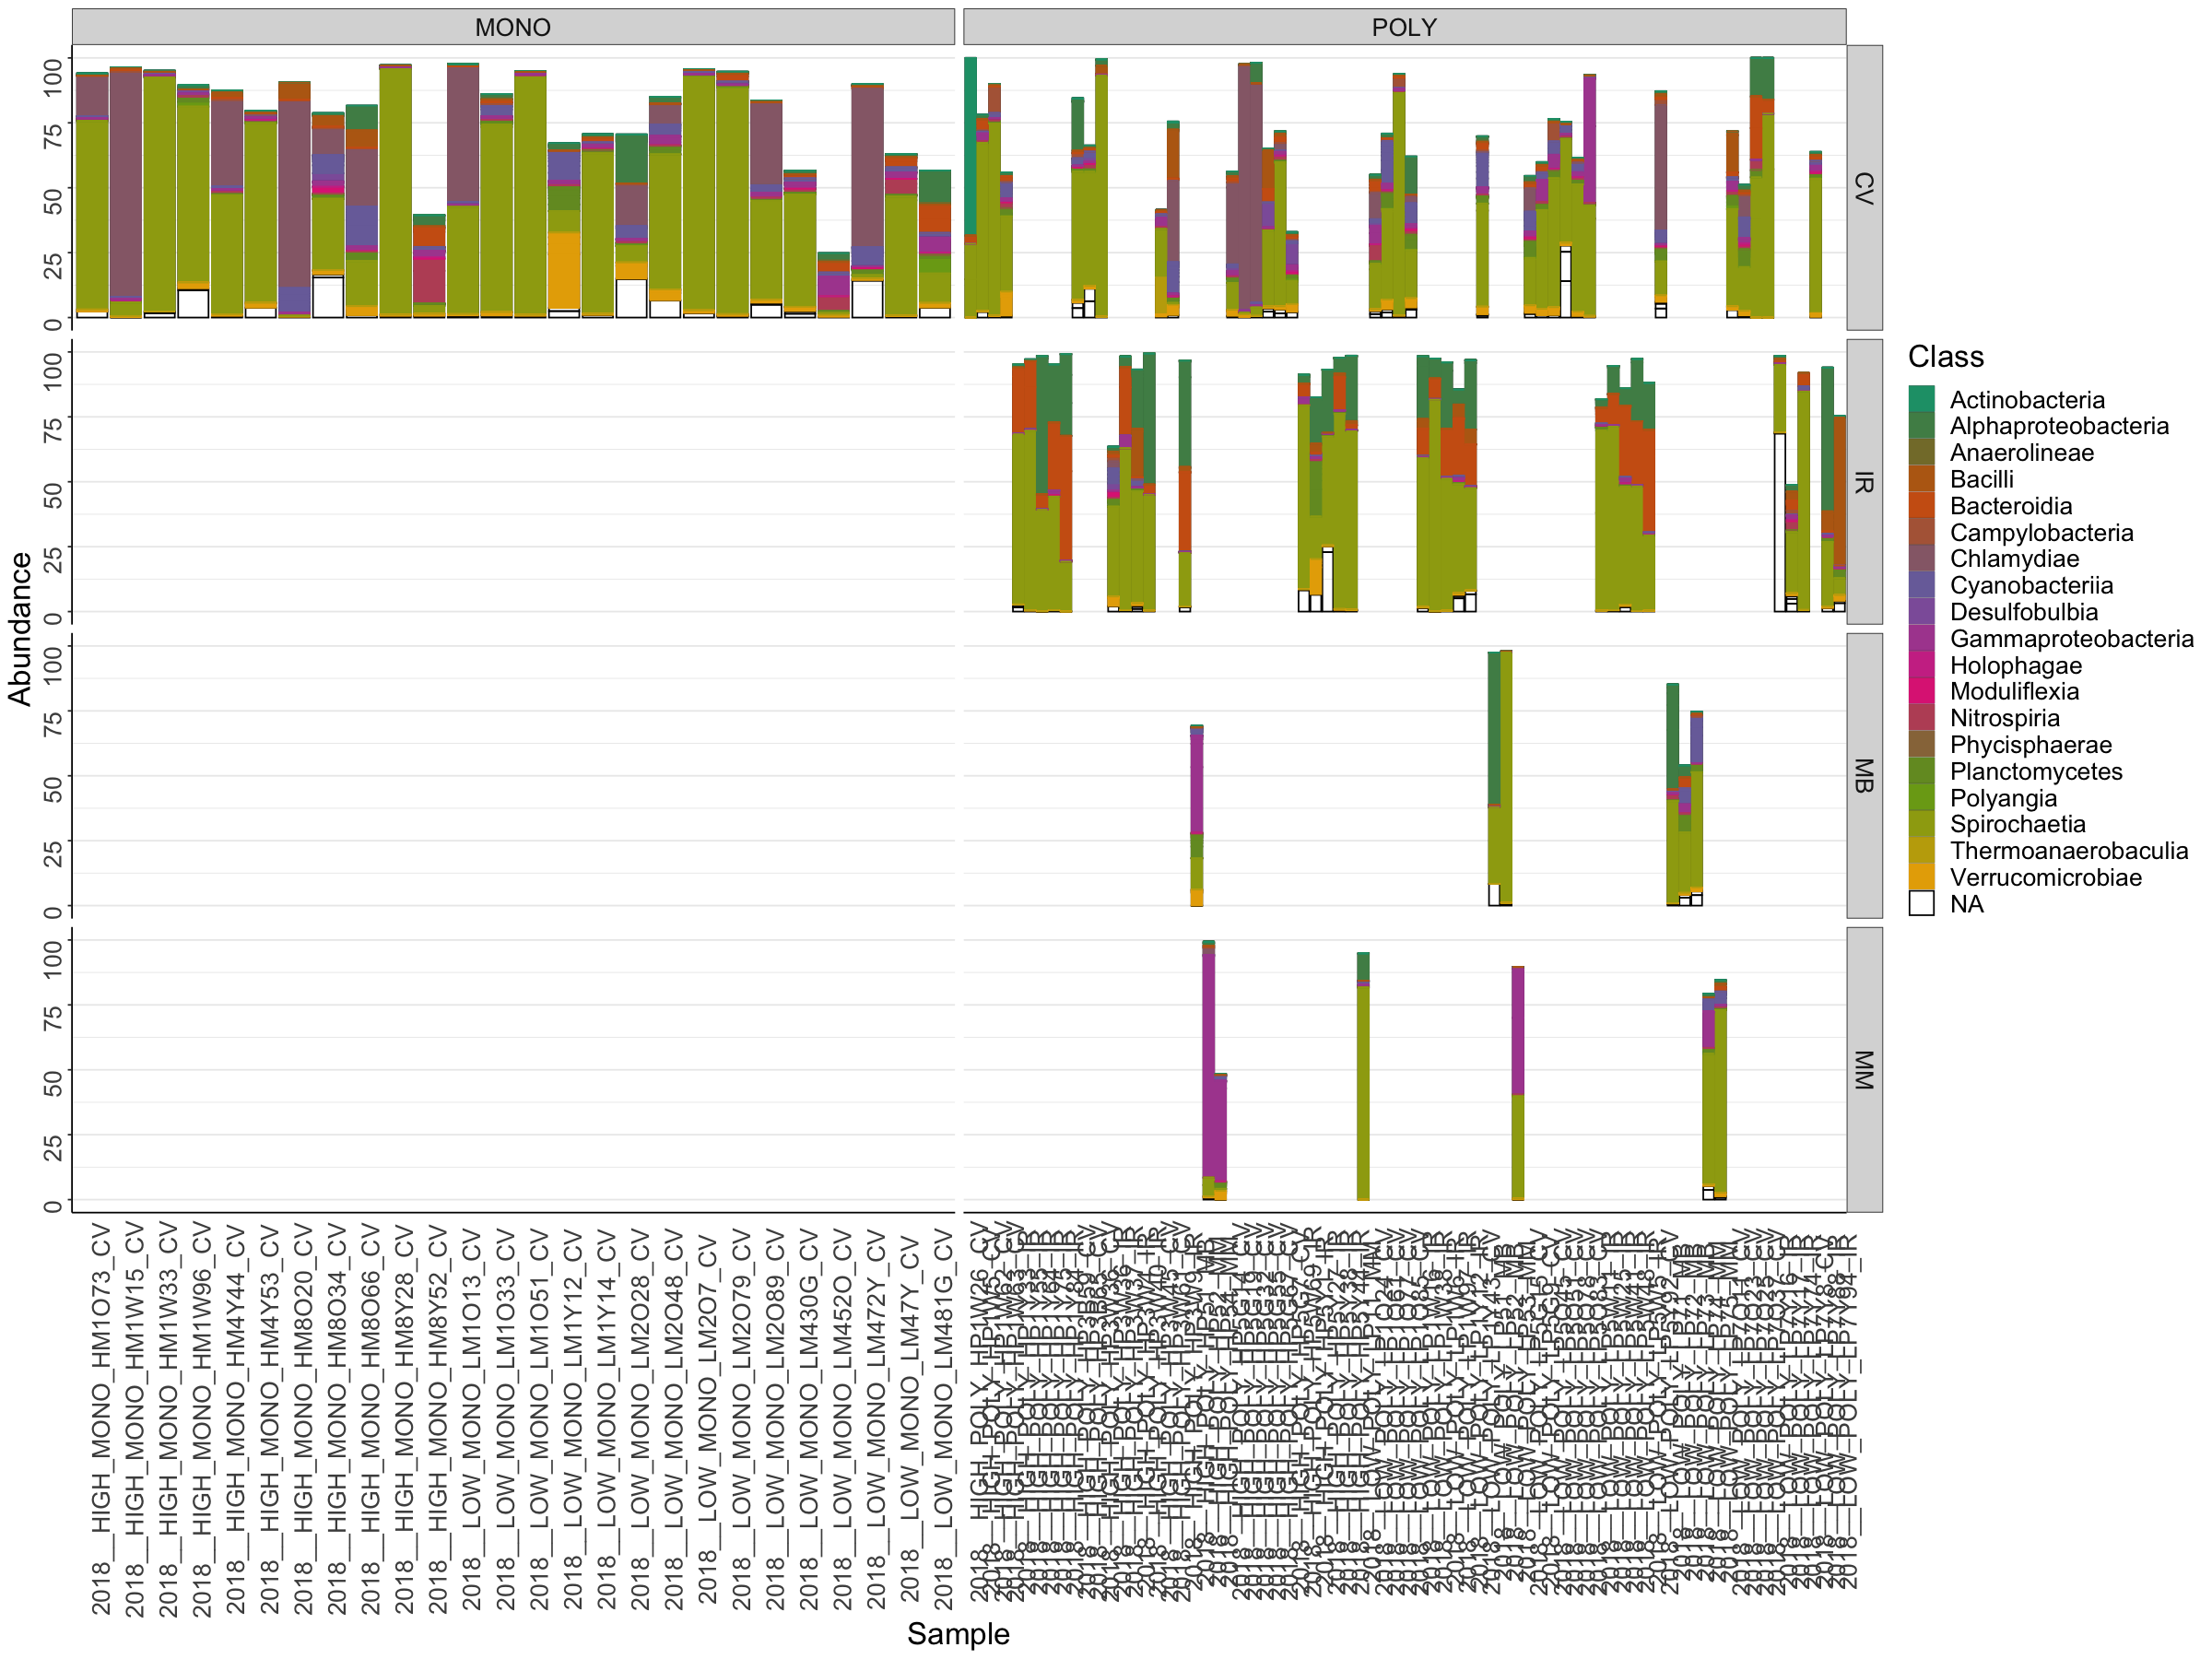

In [156]:
plot_bar(DEp100,  fill="Class") +
geom_bar(aes(color=Class, fill=Class), stat="identity", position="stack")+
facet_grid(Species~Treatment2_Diversity, scales="free_x")+
scale_fill_manual(values=mycolors)+
scale_color_manual(values=mycolors)+
theme_bw()+
theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(angle=90),
          text = element_text(size=20))

In [40]:
CVdds = phyloseq_to_deseq2(CV, ~ Treatment2_Diversity)
CVdds = DESeq(CVdds, test="Wald", fitType="parametric")

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 5547 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



In [122]:
res = results(CVdds, cooksCutoff = FALSE)
alpha = 0.05
sigCV = res[which(res$padj < alpha), ]
sigCV = cbind(as(sigtab, "data.frame"), as(tax_table(CV)[rownames(sigCV), ], "matrix"))
NROW(sigCV)

[1] 497

In [165]:
sigCV

baseMean    
TACGTATGGGGCAAACGTTGTTCGGATTCACTGGGCGTAAAGAGTACGTAGGCTGTCGAGACAGTCAATGATCAAATCCCGTAGCTTAACTACGTGGTCGTTGTTGATACTACTCGACTAGAGTTTTATAGAGGTAGCGGGAATTCCTGGTGTAGGGGTGAAATCTGTTGATATCAGGAGGAACACCAAAGGCGAAGGCAAGCTACTGGGTAAAAACTGACGCTGAGGTACGAAAGCCAGGGGAGCAAATGGG                                                                                                                                                                            23805.150906
TACGTATGGGGCAAACGTTGTTCGGATTCACTGGGCGTAAAGAGTACGTAGGCGGTTAAGTAAGTTAATGATAAAAGACCGTGGCTCAACCACGGAAATGTTGTTAATACTGCTTGACTAGAATTTTTGATAGAGGTAGCGGGAATTCCTGGTGTAGGGGTGAAATCTGTTGATATCAGGAGGAACACCAAAGGCGAAGGCAAGCTACTGGGTAAAAATTGACGCTGAGGTACGAAAGCCAGGGGAGCAAATGGG                                                                                                                                                                             60.379227
TTCCAGCTCCAATAGCGTATATTAAAGTTGCTGCAGTTAAAAAGCTCGTAGCTGGATCTCGGGTCCAGGCTGGCGGTCCACCTCGTTGTGGTTACTGCCTGTTCTGACCCAACCTCTCGGTTGTAAACCCTTGGTGCTCTTGATTGAGTTGCTTCGGGTGGCCGAAACTTTTACTTTGAAAAAATTAGAGTGTTCAAAGCAGGCGATTCGCCTGCACAATGGTGCATGGAATAATGGAATAGGACCTCGGTTCTATTTTGTTGGTTTTCGGAACACGAGGTAATGATTAAGAGGGACTGACGGGGGCATTCGTATGGCGGGGTTAGAGGTGAAATTCTTGGATCCTCGCCAGACGGCCTACAGCGAAAGCATTTGCCAAGCATGTTTTCATTAGTCAAGAACGAAAGTCAGAGGTTCGAAGACG 29204.627719
TACATAGGGTGCAAGCGTTATCCGGAATTATTGGGCGTAAAGCGTTCGTAGGTGGTCAAGAAAGTCTGAAGTTAAAGCTCGGGGCTCAACCCCGACCCGCTTTGGAAACTACTTGACTAGAGTCATGAAGAGGTTAGCGGAACTCCATGTGAAGCGGTGGAATGCGTAGATATATGGAAGAACACCAATGGCGAAGGCAGCTAACTGGGAATGAACTGACACTGAGGGACGAAAGCGTGGGGAGCAAACAGG                                                                                                                                                                                 2.068002
TACGGAGGATGCAAGTGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGTGGTCTGGTAAGTCAGAGGTGAAAGACGGTGGCTCAACCATCGCAGTGCCCTTGATACTATTGGACTAGATTACATTGGAAGTAGGCGGAATGTGCGGTGTAGCGGTGAAATGCGCAGATATCGCACGGAACACCAATAGCGAAAGCAGCTTACTATACTGTTAATGACACTGAGGCACGAAAGCGTGGGTAGCAAATAGG                                                                                                                                                                             1864.358268
TACGTAAGGGGCAAGCGTTGTTCGGAATTATTGGGCGTAAAGGGCATGTAGGTGGTAAGATAAGCTTGGAGTAAAAGACCGCAGCTCAACTGCGGAGAGCGTTGAGAACTGTCTTACTAGAGTCTAGGAGAGGAAGCTGGAATTCTTGGAGGAGGGGTGAAATCTGTAGATCCCAAGGAGAACACCAGAGGCGAAGGCGAGCTTCTGGCCATAGACTGACACTGAGATGCGAAAGCGTGGGTAGCGAACAGG                                                                                                                                                                              1075.194741
TACGTAGGTCCCAAGCGTTATCCGGAATTATTGGGCGTAAAGGGTCCGTAGACGGTTTATTAAGTCTGATGTGAAAGCCACCGGCTCAACCGGTGAAACGCATTAGATACTGGTAAACTAGAGTATGTTAGAGGATAGTGGAATTCCATGTGTAGCGGTGAAATGCGTAGATATATGGAGGAACACCAGTGGCGAAGGCGGCTATCTGGGACATTACTGACGTTGAGGGACGAAAGCGTGGGGAGCGAACAGG                                                                                                                                                                             5060.489094
TACGTAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGTGCGCAGGCGGCCTTAAAAGTCAGATGTGAAATCCCCGAGCTCAACTTGGGAACTGCGTTTGAAACTCTAAGGCTAGAGTATGTCAGAGGGGGGTAGAATTCCACGTGTAGCAGTGAAATGCGTAGAGATGTGGAGGAATACCGATGGCGAAGGCAGCCCCCTGGGATAATACTGACGCTCATGCACGAAAGCGTGGGGATCAAACAGG                                                                                                                                                                              269.927366
TACATAGGGTGCAAGCGTTATCCGGAATTATTGGGCGTAAAGCGTTCGTAGGTTGTCTAGTAAGTCTGAAGTTAAAGCCCGGGGCTCAACCCCGGCCCGCTTTGGAAACTACTAGACTAGAGTCGTGAAGAGGTAAATGGAACTCCATGTGAAGCGGTGGAATGCGTAGATATATGGAAGAACACCAATGGCGAAGGCAATTTACTGGTAACGAACTGACACTGAGGAACGAAAGCGTGGGGAGCAAACAGG                                                                                                                                                                                33.522453
TACGTAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGT

In [123]:
table(sigCV$Class)


              028H05-P-BN-P5                         ABY1 
                           1                            1 
              Acidimicrobiia               Actinobacteria 
                           5                            5 
         Alphaproteobacteria                 Anaerolineae 
                         103                           11 
                    Babeliae                      Bacilli 
                           4                            7 
                 Bacteroidia              Bdellovibrionia 
                          69                            9 
              Blastocatellia                     BRH-c20a 
                           1                            1 
             Campylobacteria                   Chlamydiae 
                           2                            3 
                  Clostridia               Cyanobacteriia 
                           5                           14 
             Defferrisomatia                   Deinococ

In [113]:
DEdds = phyloseq_to_deseq2(DEd, ~ Species)
DEdds = DESeq(DEdds, test="Wald", fitType="parametric")

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 6941 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



In [124]:
res = results(DEdds, cooksCutoff = FALSE)
alpha = 0.05
sigDE = res[which(res$padj < alpha), ]
sigDE = cbind(as(sigDE, "data.frame"), as(tax_table(DEd)[rownames(sigDE), ], "matrix"))
NROW(sigDE)

[1] 1209

In [130]:
colnames(sigDE)

[1] "baseMean"       "log2FoldChange" "lfcSE"          "stat"          
 [5] "pvalue"         "padj"           "Kingdom"        "Phylum"        
 [9] "Class"          "Order"          "Family"         "Genus"

In [133]:
overlap=merge(sigDE, sigCV, by=c("row.names"))

Warning message in merge.data.frame(sigDE, sigCV, by = c("row.names")):
“column names ‘Kingdom.y’, ‘Phylum.y’, ‘Class.y’, ‘Order.y’, ‘Family.y’, ‘Genus.y’ are duplicated in the result”


In [158]:
table(overlap$Class.x)


              Acidimicrobiia               Actinobacteria 
                           2                            3 
         Alphaproteobacteria                 Anaerolineae 
                          33                            3 
                    Babeliae                      Bacilli 
                           1                            2 
                 Bacteroidia              Bdellovibrionia 
                          23                            1 
              Blastocatellia              Campylobacteria 
                           1                            1 
                  Chlamydiae                   Clostridia 
                           1                            2 
              Cyanobacteriia                Desulfarculia 
                           2                            3 
               Desulfobaccia              Desulfobacteria 
                           1                            1 
               Desulfobulbia             Desulfovibrion

In [159]:
overlap[overlap$Class.x=="Spirochaetia",]

Row.names                                                                                                                                                                                                                                                                        
NA   NA                                                                                                                                                                                                                                                                               
NA.1 NA                                                                                                                                                                                                                                                                               
17   GTGTCAGCAGCGCGGTCATACGTAGGGGGCGAACGTTGTTCGGAATCACTGGGCGTAAAGGGTGCGCAGGCTGCTCATCAAGTCAGTTGTGAAATTTCGTGGCTCAACCACGAAGCTGCTGCTGATACTGTTGGGCTAGAGTCATAGATAGAGGTAGCGGGAATTCCTGGTGTAGGAGTGAAATCTGTAGATATCAGGAGGAACACCAAGGGTGAAGACAAGCTACTGGGTAATGACTGACGCTGAGGCACGAAAGCTAGGGGAGCAAATGGG
NA.2 NA                                                                                                                                                                                                                                                                               
NA.3 NA                                                                                                                                                                                                                                                                               
NA.4 NA                                                                                                                                                                                                                                                                               
147  TACGTATGGGGCAAACGTTGTTCGGATTCACTGGGCGTAAAGAGTACGTAGGCGGTTAAGTAAGTTAATGATAAAAGACCGTGGCTCAACCACGGAAATGTTGTTAATACTGCTTGACTAGAATTTTTGATAGAGGTAGCGGGAATTCCTGGTGTAGGGGTGAAATCTGTTGATATCAGGAGGAACACCAAAGGCGAAGGCAAGCTACTGGGTAAAAATTGACGCTGAGGTACGAAAGCCAGGGGAGCAAATGGG                  
NA.5 NA                                                                                                                                                                                                                                                                               
NA.6 NA                                                                                                                                                                                                                                                                               
     baseMean.x log2FoldChange.x lfcSE.x  stat.x    pvalue.x     padj.x      
NA         NA          NA              NA        NA           NA           NA
NA.1       NA          NA              NA        NA           NA           NA
17    210.317   -28.74299        6.242504 -4.604400 4.136558e-06 1.666546e-05
NA.2       NA          NA              NA        NA           NA           NA
NA.3       NA          NA              NA        NA           NA           NA
NA.4       NA          NA              NA        NA           NA           NA
147  1890.384   -25.05212        6.242627 -4.013074 5.993306e-05 1.933259e-04
NA.5       NA          NA              NA        NA           NA           NA
NA.6       NA          NA              NA        NA           NA           NA
     Kingdom.x Phylum.x      Class.x      ⋯ Class.y      Order.y       
NA   NA        NA            NA           ⋯ NA           NA            
NA.1 NA        NA            NA           ⋯ NA           NA            
17   Bacteria  Spirochaetota Spirochaetia ⋯ Spirochaetia Spirochaetales
NA.2 NA        NA            NA           ⋯ NA           NA            
NA.3 NA        NA            NA           ⋯ NA           NA            
NA.

In [35]:
CV_mono = subset_samples(DE, Species%in%c("CV")& Treatment2_Diversity %in%c("MONO"))
CV_poly = subset_samples(DE, Species%in%c("CV")& Treatment2_Diversity %in%c("POLY"))
IR = subset_samples(DE, Species%in%c("IR"))
M = subset_samples(DE, Species%in%c("MB", "MM"))

In [83]:
IR

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 7294 taxa and 30 samples ]
sample_data() Sample Data:       [ 30 samples by 17 sample variables ]
tax_table()   Taxonomy Table:    [ 7294 taxa by 6 taxonomic ranks ]

In [111]:
#what otus are present in every mussel?
flist= filterfun(kOverA(30, 0))
IR_all=filter_taxa(IR, flist, TRUE )
tax_table(IR_all)

Kingdom 
TACGTATGGGGCAAACGTTGTTCGGATTCACTGGGCGTAAAGAGTACGTAGGCTGTCGAGACAGTCAATGATCAAATCCCGTAGCTTAACTACGTGGTCGTTGTTGATACTACTCGACTAGAGTTTTATAGAGGTAGCGGGAATTCCTGGTGTAGGGGTGAAATCTGTTGATATCAGGAGGAACACCAAAGGCGAAGGCAAGCTACTGGGTAAAAACTGACGCTGAGGTACGAAAGCCAGGGGAGCAAATGGG Bacteria
                                                                                                                                                                                                                                                              Phylum       
TACGTATGGGGCAAACGTTGTTCGGATTCACTGGGCGTAAAGAGTACGTAGGCTGTCGAGACAGTCAATGATCAAATCCCGTAGCTTAACTACGTGGTCGTTGTTGATACTACTCGACTAGAGTTTTATAGAGGTAGCGGGAATTCCTGGTGTAGGGGTGAAATCTGTTGATATCAGGAGGAACACCAAAGGCGAAGGCAAGCTACTGGGTAAAAACTGACGCTGAGGTACGAAAGCCAGGGGAGCAAATGGG Spirochaetota
                                                                                                                                                                                                                                                              Class       
TACGTATGGGGCAAACGTTGTTCGGATTCACTGGGCGTAAAGAGTACGTAGGCTGTCGAGACAGTCAATGATCAAATCCCGTAGCTTAACTACGTGGTCGTTGTTGATACTACTCGACTAGAGTTTTATAGAGGTAGCGGGAATTCCTGGTGTAGGGGTGAAATCTGTTGATATCAGGAGGAACACCAAAGGCGAAGGCAAGCTACTGGGTAAAAACTGACGCTGAGGTACGAAAGCCAGGGGAGCAAATGGG Spirochaetia
                                                                                                                                                                                                                                                              Order         
TACGTATGGGGCAAACGTTGTTCGGATTCACTGGGCGTAAAGAGTACGTAGGCTGTCGAGACAGTCAATGATCAAATCCCGTAGCTTAACTACGTGGTCGTTGTTGATACTACTCGACTAGAGTTTTATAGAGGTAGCGGGAATTCCTGGTGTAGGGGTGAAATCTGTTGATATCAGGAGGAACACCAAAGGCGAAGGCAAGCTACTGGGTAAAAACTGACGCTGAGGTACGAAAGCCAGGGGAGCAAATGGG Spirochaetales
                                                                                                                                                                                                                                                              Family         
TACGTATGGGGCAAACGTTGTTCGGATTCACTGGGCGTAAAGAGTACGTAGGCTGTCGAGACAGTCAATGATCAAATCCCGTAGCTTAACTACGTGGTCGTTGTTGATACTACTCGACTAGAGTTTTATAGAGGTAGCGGGAATTCCTGGTGTAGGGGTGAAATCTGTTGATATCAGGAGGAACACCAAAGGCGAAGGCAAGCTACTGGGTAAAAACTGACGCTGAGGTACGAAAGCCAGGGGAGCAAATGGG Spirochaetaceae
                                                                                                                                                                                                                                                              Genus
TACGTATGGGGCAAACGTTGTTCGGATTCACTGGGCGTAAAGAGTACGTAGGCTGTCGAGACAGTCAATGATCAAATCCCGTAGCTTAACTACGTGGTCGTTGTTGATACTACTCGACTAGAGTTTTATAGAGGTAGCGGGAATTCCTGGTGTAGGGGTGAAATCTGTTGATATCAGGAGGAACACCAAAGGCGAAGGCAAGCTACTGGGTAAAAACTGACGCTGAGGTACGAAAGCCAGGGGAGCAAATGGG NA

In [80]:
CV_mono

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 7294 taxa and 26 samples ]
sample_data() Sample Data:       [ 26 samples by 17 sample variables ]
tax_table()   Taxonomy Table:    [ 7294 taxa by 6 taxonomic ranks ]

In [36]:
#what otus are absent from monoculture oysters
CV_mono_0=filter_taxa(CV_mono, function(x) sum(x) == 0, TRUE)
CV_mono_0
absentOTUs=taxa_names(CV_mono_0)

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 3850 taxa and 26 samples ]
sample_data() Sample Data:       [ 26 samples by 17 sample variables ]
tax_table()   Taxonomy Table:    [ 3850 taxa by 6 taxonomic ranks ]

In [286]:
CV_poly_mono0=prune_taxa(absentOTUs, CV_poly)
CV_poly_mono0

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 3850 taxa and 32 samples ]
sample_data() Sample Data:       [ 32 samples by 17 sample variables ]
tax_table()   Taxonomy Table:    [ 3850 taxa by 6 taxonomic ranks ]

In [304]:
IR_mono0=prune_taxa(absentOTUs, IR)


In [315]:
IRCV_poly_mono0=merge_phyloseq(IR_mono0, CV_poly_mono0)

In [316]:
IRCV_poly_mono0_100 = prune_taxa(names(sort(taxa_sums(IRCV_poly_mono0),TRUE)[1:100]), IRCV_poly_mono0)


In [323]:
mycolors= colorRampPalette(brewer.pal(8, "Dark2"))(119)

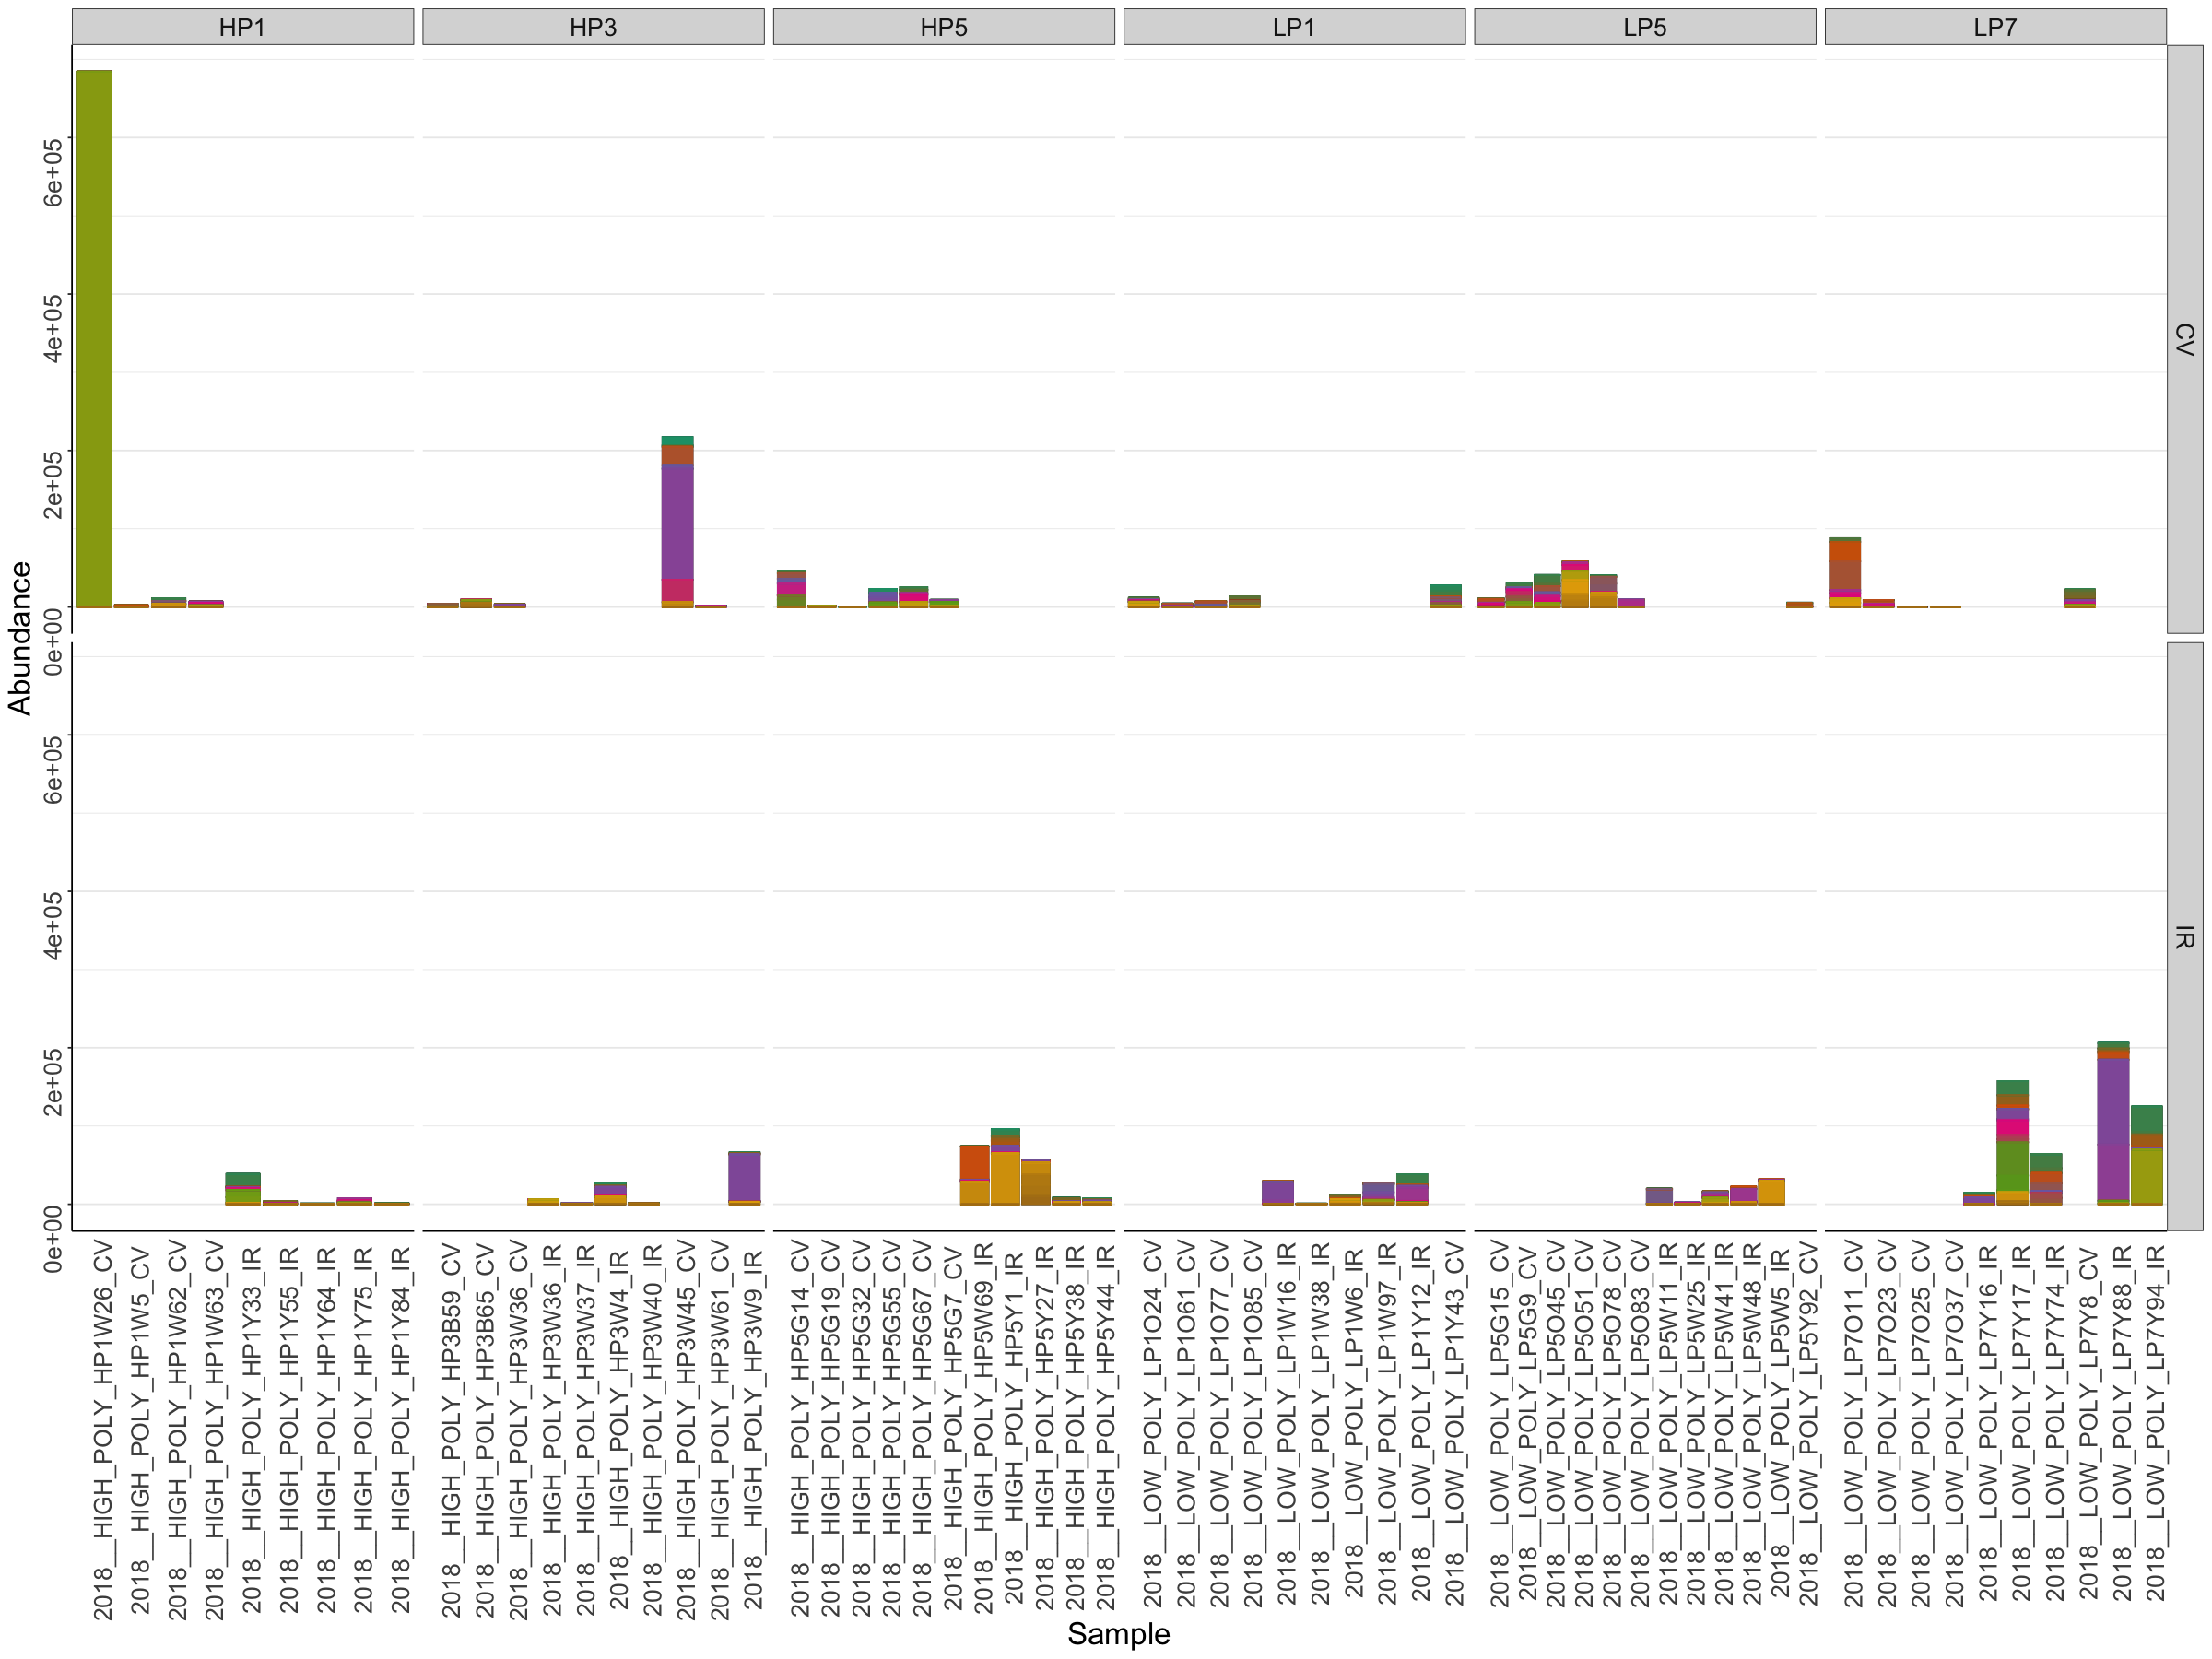

In [325]:
plot_bar(IRCV_poly_mono0_100,  fill="OTU") +
geom_bar(aes(color=OTU, fill=OTU), stat="identity", position="stack")+
facet_grid(Species~Color_Bucket, scales="free_x")+
scale_fill_manual(values=mycolors)+
scale_color_manual(values=mycolors)+
theme_bw()+
theme(legend.position="none", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(angle=90),
          text = element_text(size=20))

In [113]:
#what otus are present in every polyculture oyster?
flist= filterfun(kOverA(32, 0))
CV_poly_all=filter_taxa(CV_poly, flist, TRUE )
tax_table(CV_poly_all)

Kingdom 
TACGTAGGGGGCGAACGTTGTTCGGAATCACTGGGCGTAAAGGGTGCGCAGGCTGCTCATCAAGTCAGTTGTGAAATTTCGTGGCTCAACCACGAAGCTGCTGCTGATACTGTTGGGCTAGAGTCATAGATAGAGGTAGCGGGAATTCCTGGTGTAGGAGTGAAATCTGTAGATATCAGGAGGAACACCAAGGGTGAAGACAAGCTACTGGGTAATGACTGACGCTGAGGCACGAAAGCTAGGGGAGCAAATGGG Bacteria
                                                                                                                                                                                                                                                                Phylum       
TACGTAGGGGGCGAACGTTGTTCGGAATCACTGGGCGTAAAGGGTGCGCAGGCTGCTCATCAAGTCAGTTGTGAAATTTCGTGGCTCAACCACGAAGCTGCTGCTGATACTGTTGGGCTAGAGTCATAGATAGAGGTAGCGGGAATTCCTGGTGTAGGAGTGAAATCTGTAGATATCAGGAGGAACACCAAGGGTGAAGACAAGCTACTGGGTAATGACTGACGCTGAGGCACGAAAGCTAGGGGAGCAAATGGG Spirochaetota
                                                                                                                                                                                                                                                                Class       
TACGTAGGGGGCGAACGTTGTTCGGAATCACTGGGCGTAAAGGGTGCGCAGGCTGCTCATCAAGTCAGTTGTGAAATTTCGTGGCTCAACCACGAAGCTGCTGCTGATACTGTTGGGCTAGAGTCATAGATAGAGGTAGCGGGAATTCCTGGTGTAGGAGTGAAATCTGTAGATATCAGGAGGAACACCAAGGGTGAAGACAAGCTACTGGGTAATGACTGACGCTGAGGCACGAAAGCTAGGGGAGCAAATGGG Spirochaetia
                                                                                                                                                                                                                                                                Order         
TACGTAGGGGGCGAACGTTGTTCGGAATCACTGGGCGTAAAGGGTGCGCAGGCTGCTCATCAAGTCAGTTGTGAAATTTCGTGGCTCAACCACGAAGCTGCTGCTGATACTGTTGGGCTAGAGTCATAGATAGAGGTAGCGGGAATTCCTGGTGTAGGAGTGAAATCTGTAGATATCAGGAGGAACACCAAGGGTGAAGACAAGCTACTGGGTAATGACTGACGCTGAGGCACGAAAGCTAGGGGAGCAAATGGG Spirochaetales
                                                                                                                                                                                                                                                                Family         
TACGTAGGGGGCGAACGTTGTTCGGAATCACTGGGCGTAAAGGGTGCGCAGGCTGCTCATCAAGTCAGTTGTGAAATTTCGTGGCTCAACCACGAAGCTGCTGCTGATACTGTTGGGCTAGAGTCATAGATAGAGGTAGCGGGAATTCCTGGTGTAGGAGTGAAATCTGTAGATATCAGGAGGAACACCAAGGGTGAAGACAAGCTACTGGGTAATGACTGACGCTGAGGCACGAAAGCTAGGGGAGCAAATGGG Spirochaetaceae
                                                                                                                                                                                                                                                                Genus
TACGTAGGGGGCGAACGTTGTTCGGAATCACTGGGCGTAAAGGGTGCGCAGGCTGCTCATCAAGTCAGTTGTGAAATTTCGTGGCTCAACCACGAAGCTGCTGCTGATACTGTTGGGCTAGAGTCATAGATAGAGGTAGCGGGAATTCCTGGTGTAGGAGTGAAATCTGTAGATATCAGGAGGAACACCAAGGGTGAAGACAAGCTACTGGGTAATGACTGACGCTGAGGCACGAAAGCTAGGGGAGCAAATGGG NA

Spirochete

In [116]:
#what otus are present in all monoculture oyster?
flist= filterfun(kOverA(26, 0))
CV_mono_all=filter_taxa(CV_mono, flist, TRUE )
otu_table(CV_mono_all)

2018__HIGH_MONO_HM1O73_CV
TACGTAGGGGGCGAACGTTGTTCGGAATCACTGGGCGTAAAGGGTGCGCAGGCTGCTCATCAAGTCAGTTGTGAAATTTCGTGGCTCAACCACGAAGCTGCTGCTGATACTGTTGGGCTAGAGTCATAGATAGAGGTAGCGGGAATTCCTGGTGTAGGAGTGAAATCTGTAGATATCAGGAGGAACACCAAGGGTGAAGACAAGCTACTGGGTAATGACTGACGCTGAGGCACGAAAGCTAGGGGAGCAAATGGG                                                                                                                                                                          725644.92                
TTCCAGCTCCAATAGCGTATATTAAAGTTGCTGCAGTTAAAAAGCTCGTAGCTGGATCTCGGGTCCAGGCTGGCGGTCCACCTCGTTGTGGTTACTGCCTGTTCTGACCCAACCTCTCGGTTGTAAACCCTTGGTGCTCTTGATTGAGTTGCTTCGGGTGGCCGAAACTTTTACTTTGAAAAAATTAGAGTGTTCAAAGCAGGCGATTCGCCTGCACAATGGTGCATGGAATAATGGAATAGGACCTCGGTTCTATTTTGTTGGTTTTCGGAACACGAGGTAATGATTAAGAGGGACTGACGGGGGCATTCGTATGGCGGGGTTAGAGGTGAAATTCTTGGATCCTCGCCAGACGGCCTACAGCGAAAGCATTTGCCAAGCATGTTTTCATTAGTCAAGAACGAAAGTCAGAGGTTCGAAGACG  23065.25                
                                                                                                                                                                                                                                                                                                                                                                                                                                         2018__HIGH_MONO_HM1W15_CV
TACGTAGGGGGCGAACGTTGTTCGGAATCACTGGGCGTAAAGGGTGCGCAGGCTGCTCATCAAGTCAGTTGTGAAATTTCGTGGCTCAACCACGAAGCTGCTGCTGATACTGTTGGGCTAGAGTCATAGATAGAGGTAGCGGGAATTCCTGGTGTAGGAGTGAAATCTGTAGATATCAGGAGGAACACCAAGGGTGAAGACAAGCTACTGGGTAATGACTGACGCTGAGGCACGAAAGCTAGGGGAGCAAATGGG                                                                                                                                                                          51998.448                
TTCCAGCTCCAATAGCGTATATTAAAGTTGCTGCAGTTAAAAAGCTCGTAGCTGGATCTCGGGTCCAGGCTGGCGGTCCACCTCGTTGTGGTTACTGCCTGTTCTGACCCAACCTCTCGGTTGTAAACCCTTGGTGCTCTTGATTGAGTTGCTTCGGGTGGCCGAAACTTTTACTTTGAAAAAATTAGAGTGTTCAAAGCAGGCGATTCGCCTGCACAATGGTGCATGGAATAATGGAATAGGACCTCGGTTCTATTTTGTTGGTTTTCGGAACACGAGGTAATGATTAAGAGGGACTGACGGGGGCATTCGTATGGCGGGGTTAGAGGTGAAATTCTTGGATCCTCGCCAGACGGCCTACAGCGAAAGCATTTGCCAAGCATGTTTTCATTAGTCAAGAACGAAAGTCAGAGGTTCGAAGACG  1358.168                
                                                                                                                                                                                                                                                                                                                                                                                                                                         2018__HIGH_MONO_HM1W33_CV
TACGTAGGGGGCGAACGTTGTTCGGAATCACTGGGCGTAAAGGGTGCGCAGGCTGCTCATCAAGTCAGTTGTGAAATTTCGTGGCTCAACCACGAAGCTGCTGCTGATACTGTTGGGCTAGAGTCATAGATAGAGGTAGCGGGAATTCCTGGTGTAGGAGTGAAATCTGTAGATATCAGGAGGAACACCAAGGGTGAAGACAAGCTACTGGGTAATGACTGACGCTGAGGCACGAAAGCTAGGGGAGCAAATGGG                                                                                                                                                                          901623.377               
TTCCAGCTCCAATAGCGTATATTAAAGTTGCTGCAGTTAAAAAGCTCGTAGCTGGATCTCGGGTCCAGGCTGGCGGTCCACCTCGTTGTGGTTACTGCCTGTTCTGACCCAACCTCTCGGTTGTAAACCCTTGGTGCTCTTGATTGAGTTGCTTCGGGTGGCCGAAACTTTTACTTTGAAAAAATTAGAGTGTTCAAAGCAGGCGATTCGCCTGCACAATGGTGCATGGAATAATGGAATAGGACCTCGGTTCTATTTTGTTGGTTTTCGGAACACGAGGTAATGATTAAGAGGGACTGACGGGGGCATTCGTATGGCGGGGTTAGAGGTGAAATTCTTGGATCCTCGCCAGACGGCCTACAGCGAAAGCATTTGCCAAGCATGTTTTCATTAGTCAAGAACGAAAGTCAGAGGTTCGAAGACG   4220.779               
                                                                                                                                                                                                                                                                                                                                                                              

## Just look at Spirochetes

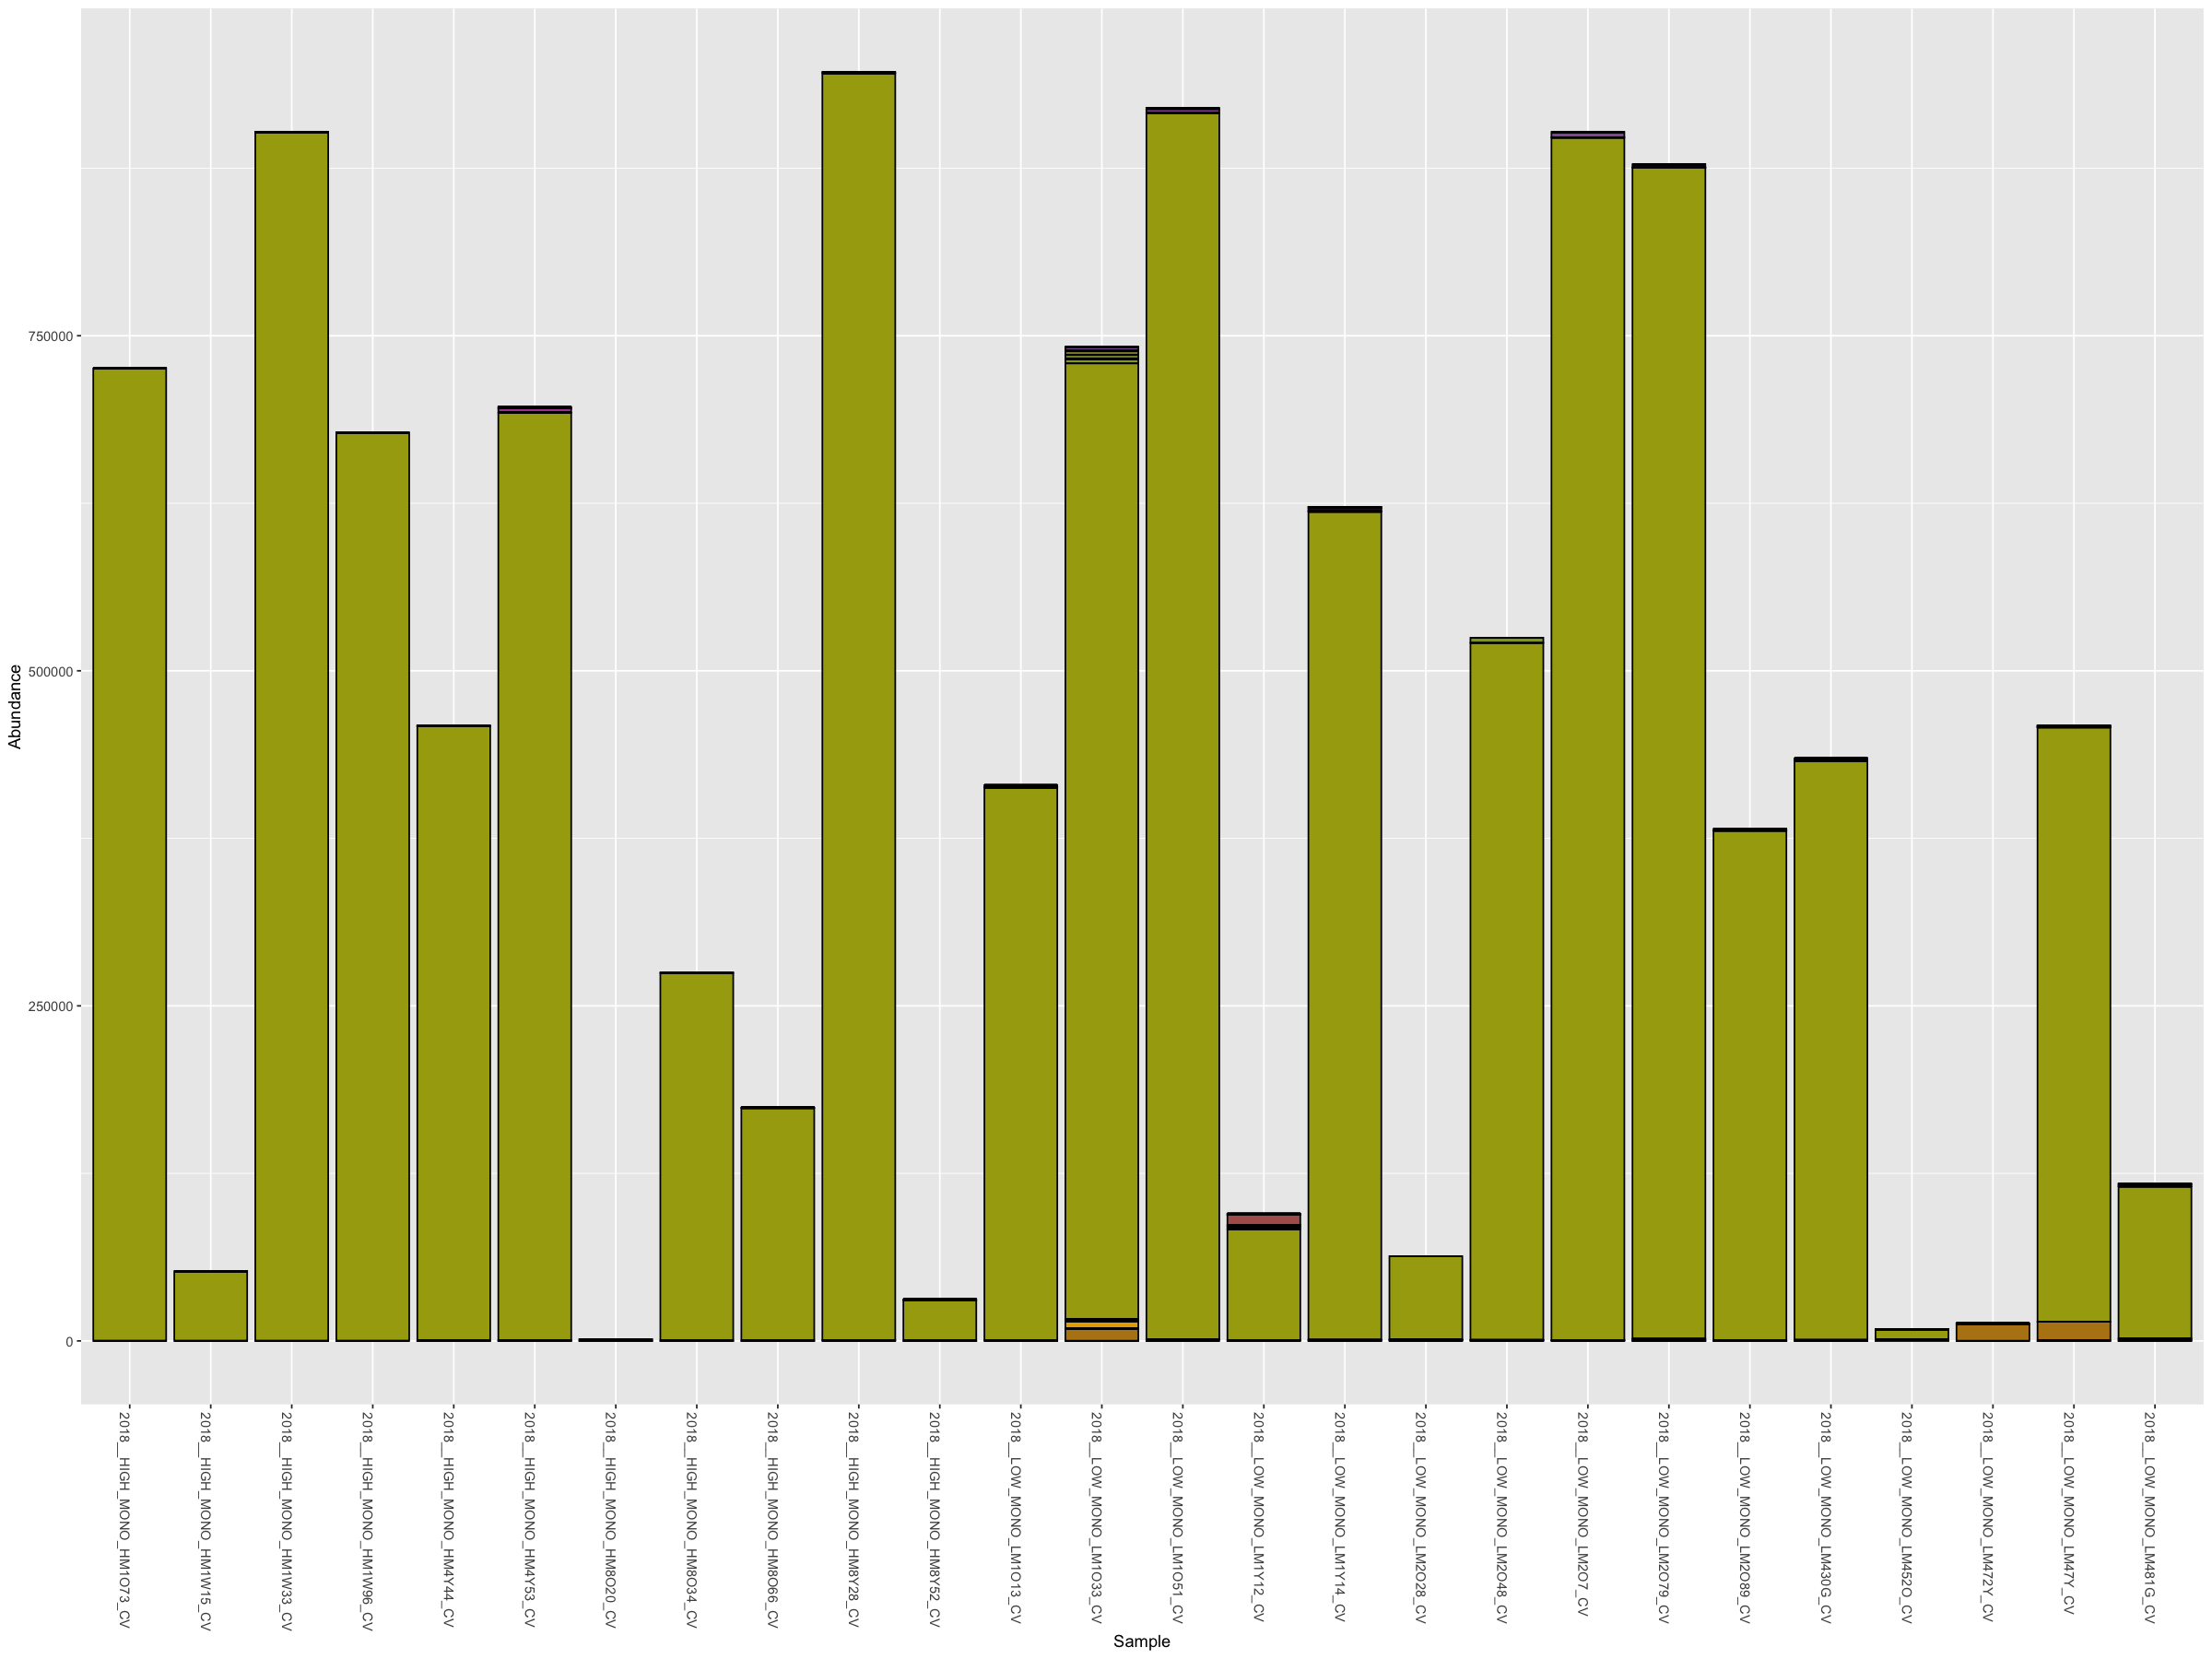

In [161]:
CV_mono_Spiro = subset_taxa(CV_mono, Phylum=="Spirochaetota")
plot_bar(CV_mono_Spiro, fill="OTU")+
scale_fill_manual(values=mycolors)+
theme(legend.position = "none")

In [3]:
CV_poly_Spiro = subset_taxa(CV_poly, Phylum=="Spirochaetota")
plot_bar(CV_poly_Spiro, fill="OTU")+
scale_fill_manual(values=mycolors)+
theme(legend.position = "none")

ERROR: Error in subset_taxa(CV_poly, Phylum == "Spirochaetota"): could not find function "subset_taxa"


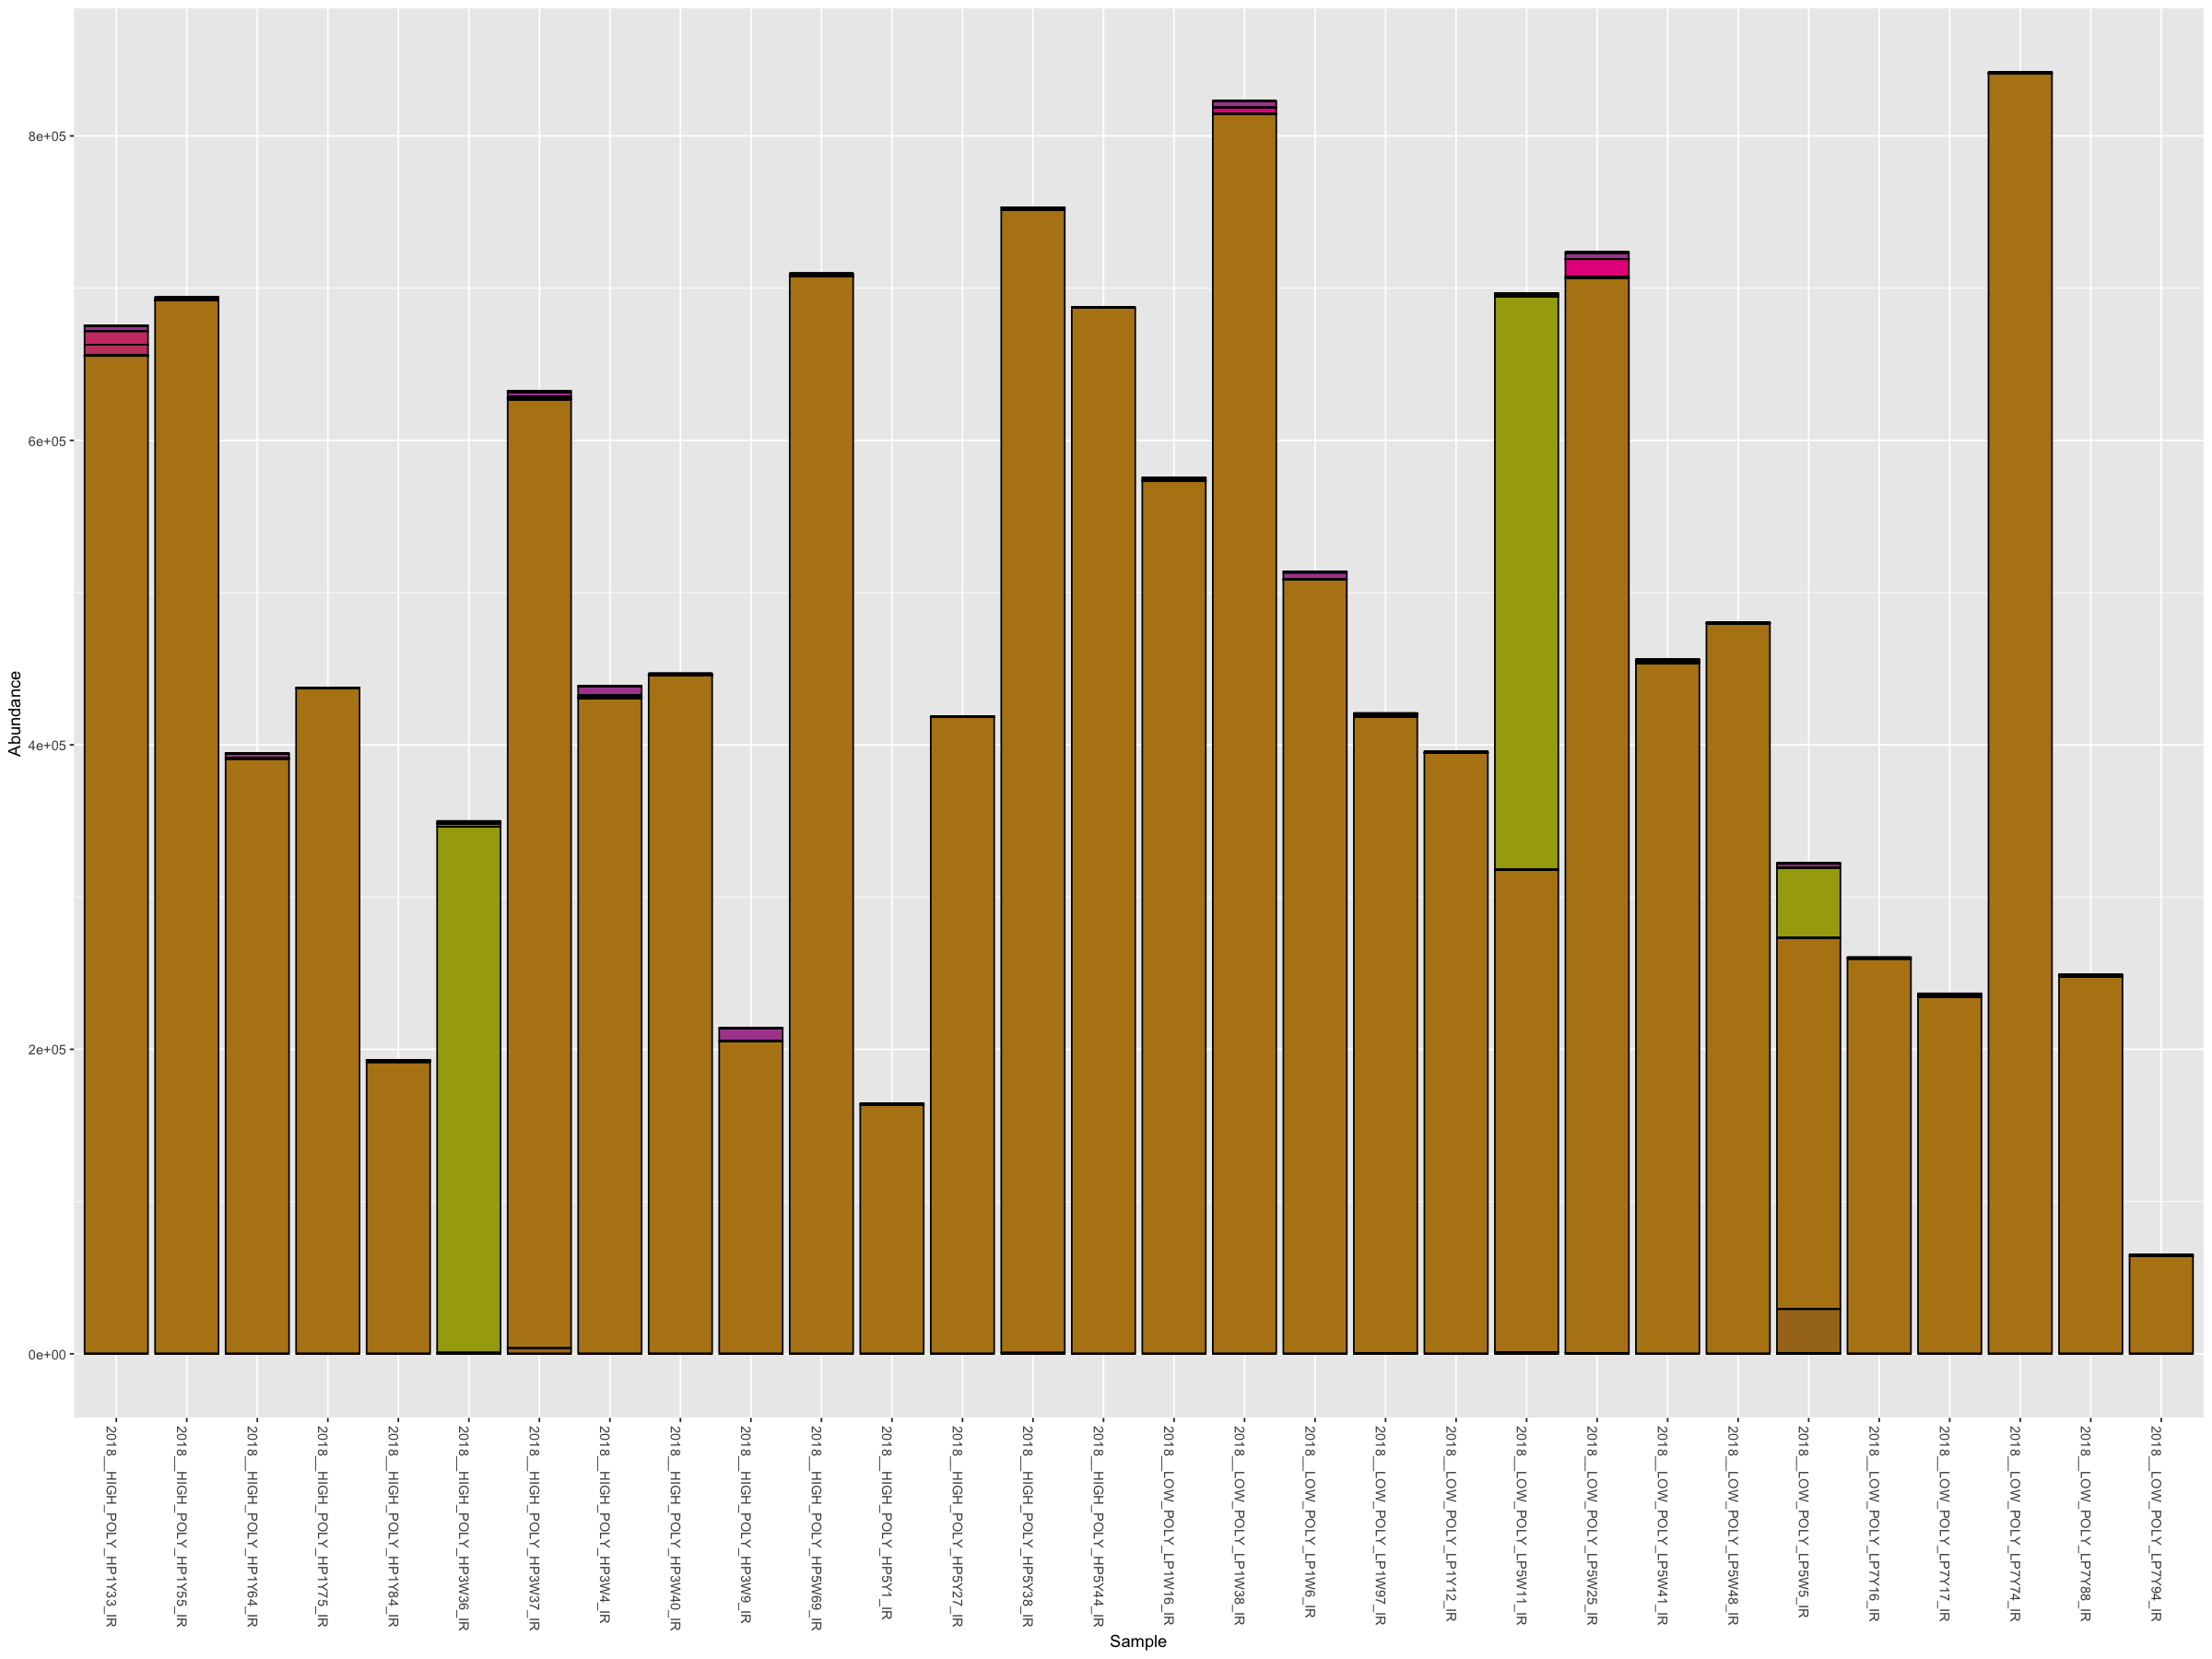

In [160]:
IR_Spiro = subset_taxa(IR, Phylum=="Spirochaetota")
plot_bar(IR_Spiro, fill="OTU")+
scale_fill_manual(values=mycolors)+
theme(legend.position = "none")

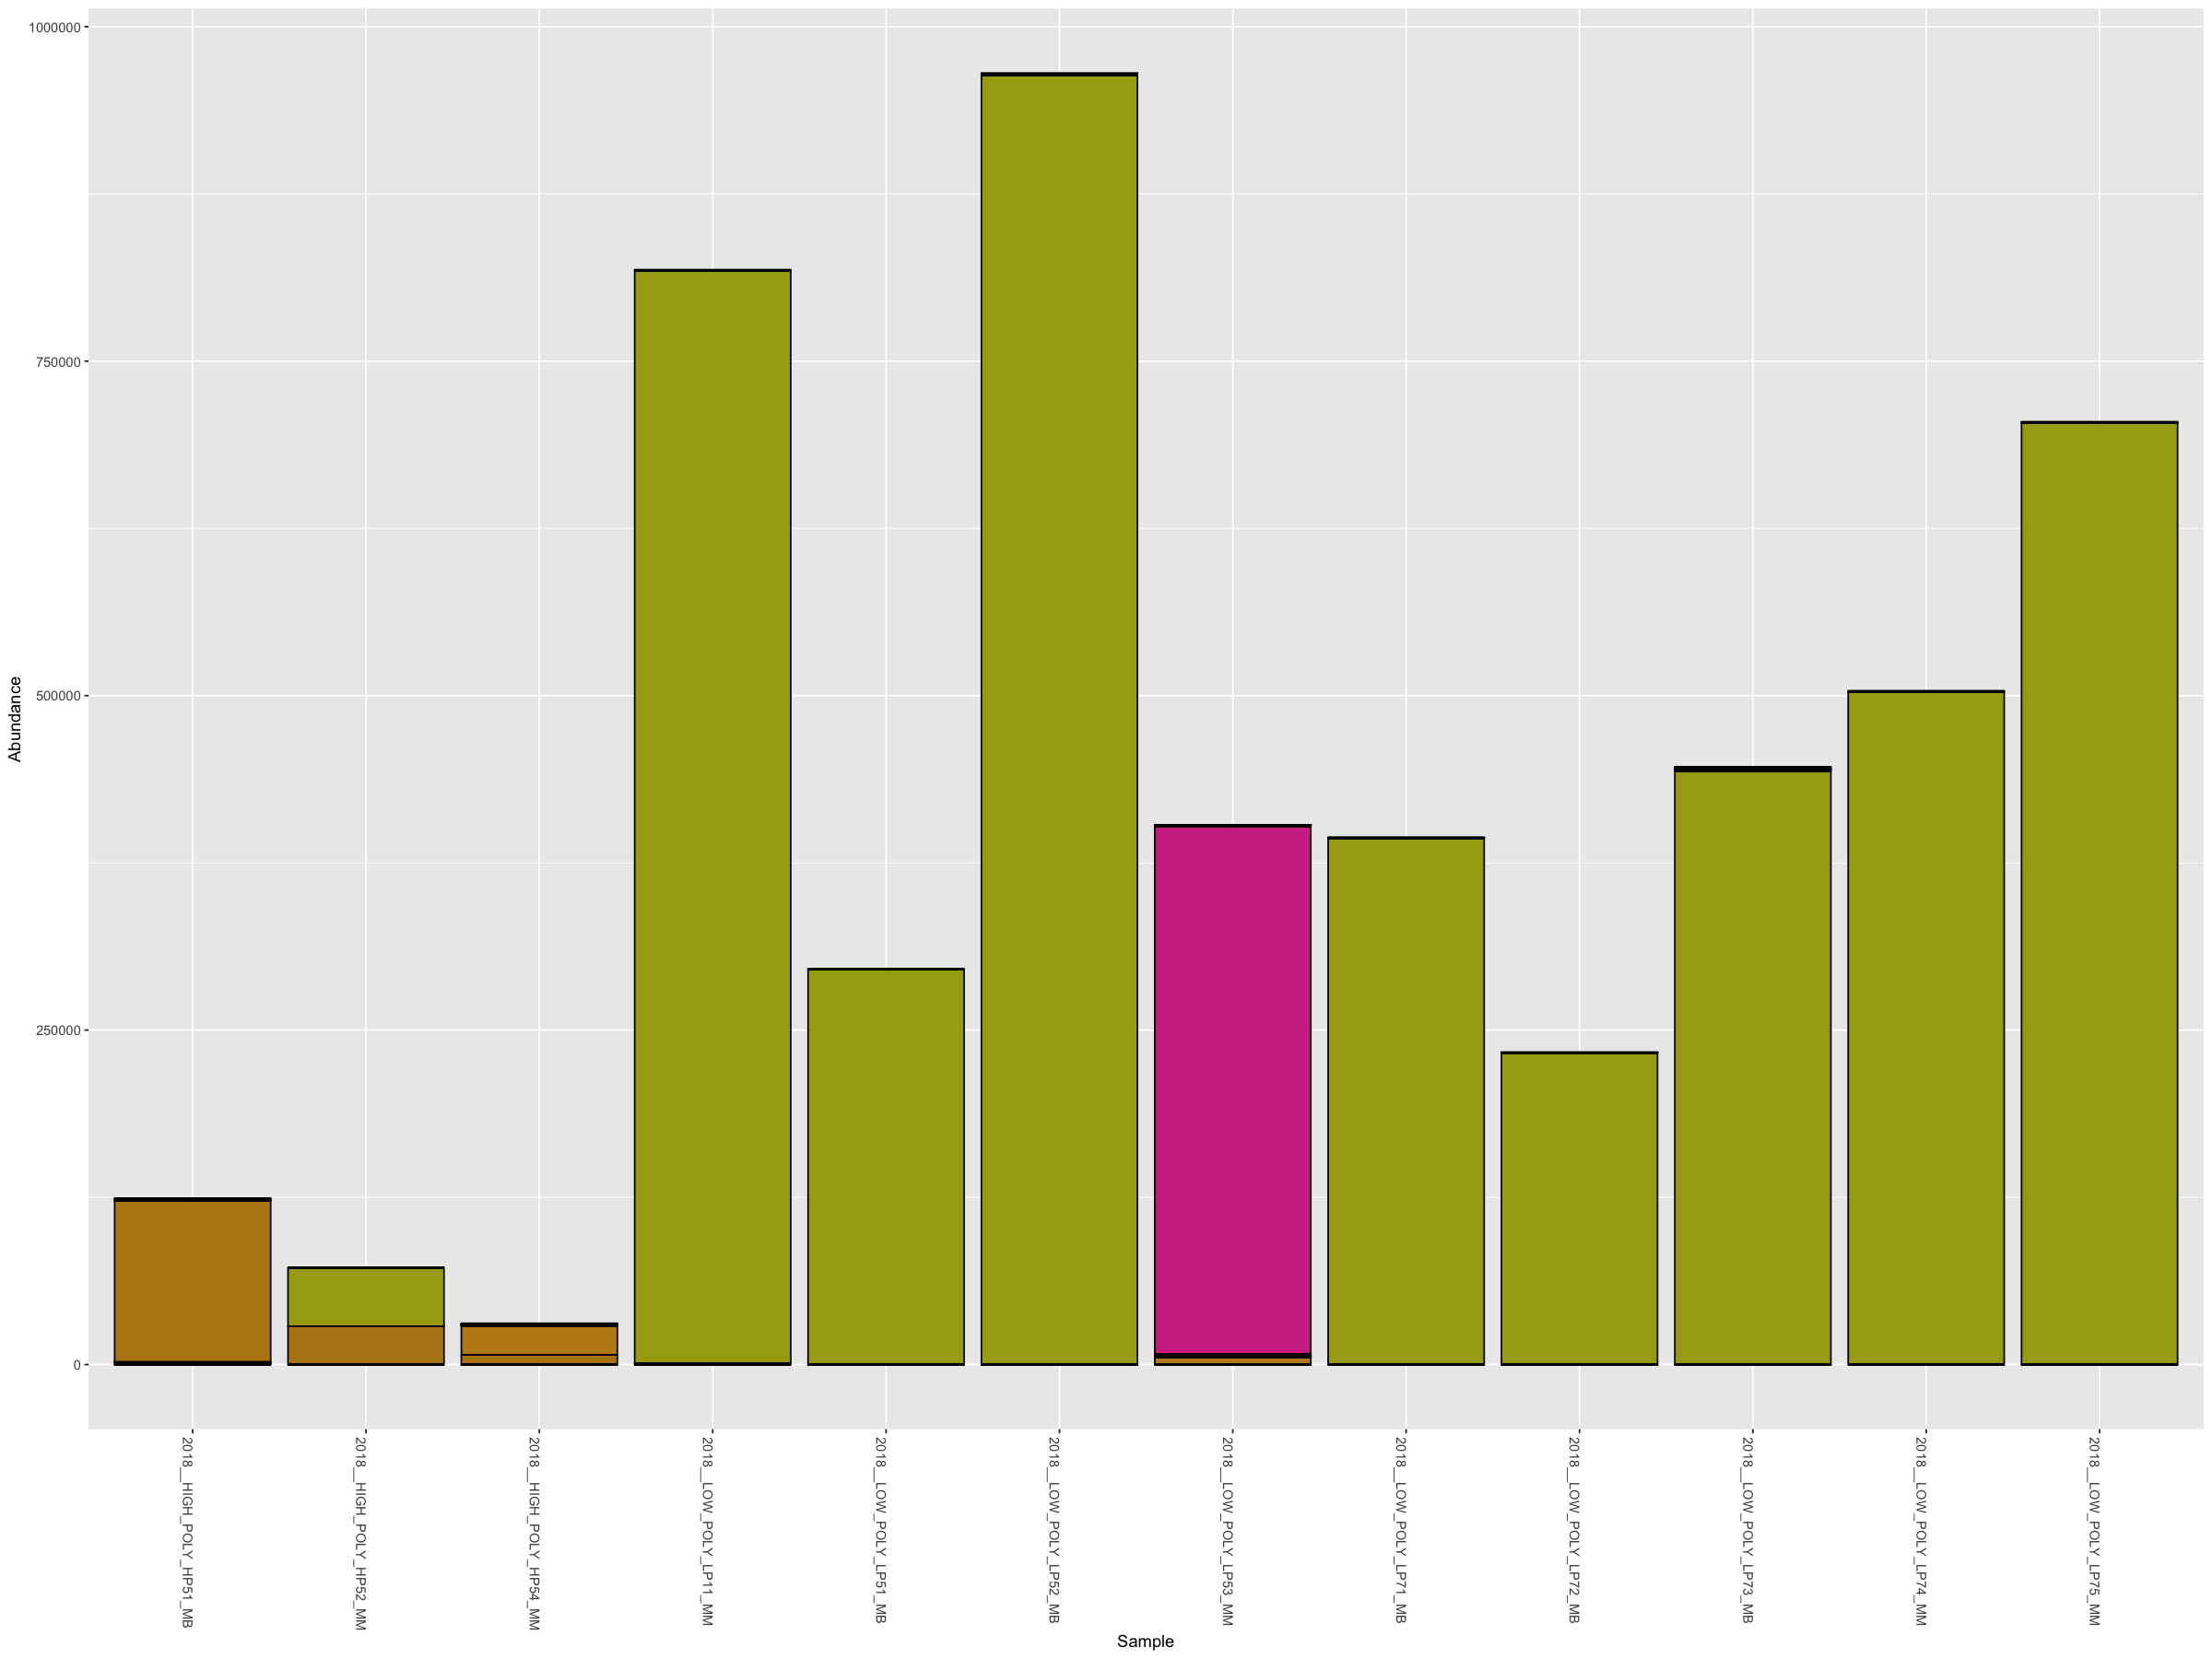

In [163]:
M_Spiro = subset_taxa(M, Phylum=="Spirochaetota")
plot_bar(M_Spiro, fill="OTU")+
scale_fill_manual(values=mycolors)+
theme(legend.position = "none")

In [28]:
Spiro_all = subset_taxa(DE, Phylum=="Spirochaetota")

Spiro_allf = filter_taxa(Spiro_all, function(x) mean(x) > 100, TRUE)

In [38]:
taxa_names(Spiro_allf)

[1] "TACGTAGGGGGCGAACGTTGTTCGGAATCACTGGGCGTAAAGGGTGCGCAGGCTGCTCATCAAGTCAGTTGTGAAATTTCGTGGCTCAACCACGAAGCTGCTGCTGATACTGTTGGGCTAGAGTCATAGATAGAGGTAGCGGGAATTCCTGGTGTAGGAGTGAAATCTGTAGATATCAGGAGGAACACCAAGGGTGAAGACAAGCTACTGGGTAATGACTGACGCTGAGGCACGAAAGCTAGGGGAGCAAATGGG"                  
[2] "TACGTATGGGGCAAACGTTGTTCGGATTCACTGGGCGTAAAGAGTACGTAGGCTGTCGAGACAGTCAATGATCAAATCCCGTAGCTTAACTACGTGGTCGTTGTTGATACTACTCGACTAGAGTTTTATAGAGGTAGCGGGAATTCCTGGTGTAGGGGTGAAATCTGTTGATATCAGGAGGAACACCAAAGGCGAAGGCAAGCTACTGGGTAAAAACTGACGCTGAGGTACGAAAGCCAGGGGAGCAAATGGG"                    
[3] "TACGTATGGGGCAAACGTTGTTCGGATTCACTGGGCGTAAAGAGTACGTAGGCGGTTAAGTAAGTTAATGATAAAAGACCGTGGCTCAACCACGGAAATGTTGTTAATACTGCTTGACTAGAATTTTTGATAGAGGTAGCGGGAATTCCTGGTGTAGGGGTGAAATCTGTTGATATCAGGAGGAACACCAAAGGCGAAGGCAAGCTACTGGGTAAAAATTGACGCTGAGGTACGAAAGCCAGGGGAGCAAATGGG"                  
[4] "TACGTAAGGAGCGAGCGTTGTTCGGAATTATTGGGCGTAAAGTGCGTGCAGGCTGTTTATTAAGTCTGATGTGAAAGTGCACAGCTTAACTGTGTTGTTGCGTTGGAAACTGGTAAACTAGAATTCGAGAGAGGAAATTGGAATTCCTGGTGTAGGGGTGAAATCTGTTGATATCAGGAAGAACACCTGAGGCGAAAGCGAATTTCTGGCTCTGAATTGACGCTGTAGCGCGAAAGCGTAGGGAGCAAACAGG"                    
[5] "TACGTAAGGGGCAAGCGTTGTTCGGAATTATTGGGCGTAAAGGGCATGTAGGTGGTAAGATAAGCTTGGAGTAAAAGACCGCAGCTCAACTGCGGAGAGCGTTGAGAACTGTCTTACTAGAGTCTAGGAGAGGAAGCTGGAATTCTTGGAGGAGGGGTGAAATCTGTAGATCCCAAGGAGAACACCAGAGGCGAAGGCGAGCTTCTGGCCATAGACTGACACTGAGATGCGAAAGCGTGGGTAGCGAACAGG"                     
[6] "TACGTATGGGGCAAACGTTGTTCGGATTCACTGGGCGTAAAGAGTACGTAGGCGGTCAAGTAAGTTAATAATTAAAGACCATGGCTCAACCATGGGAATGTTGTTGATACTGCTTAACTAGAATTTTTTATAGAGGTAGCGGGAATTCCTGGTGTAGGGGTGAAATCTGTTGATATCAGGAGGAACACCGAAGGCGAAGGCAAGCTACTGGGTAAAGATTGACGCTGAGGTACGAAAGCCAGGGGAGCAAATGGG"                  
[7] "TACGTATGGGGCAAACGTTGTTCGGATTCACTGGGCGTAAAGAGTACGTAGGCTGTCGAGACAGTCAATGATCAAATTCCGTAGCTTAACTACGTGGTCGTTGTTGATACTACTCGACTAGAGTTTTATAGAGGTAGCGGGAATTCCTGGTGTAGGGGTGAAATCTGTTGATATCAGGAGGAACACCAAAGGCGAAGGCAAGCTACTGGGTAAAAACTGACGCTGAGGTACGAAAGCCAGGGGAGCAAATGGG"                    
[8] "GTGTCAGCAGCGCGGTCATACGTAGGGGGCGAACGTTGTTCGGAATCACTGGGCGTAAAGGGTGCGCAGGCTGCTCATCAAGTCAGTTGTGAAATTTCGTGGCTCAACCACGAAGCTGCTGCTGATACTGTTGGGCTAGAGTCATAGATAGAGGTAGCGGGAATTCCTGGTGTAGGAGTGAAATCTGTAGATATCAGGAGGAACACCAAGGGTGAAGACAAGCTACTGGGTAATGACTGACGCTGAGGCACGAAAGCTAGGGGAGCAAATGGG"
[9] "TACGTAAGGGGCAAGCGTTGTTCGGAATTATTGGGCGTAAAGGGTACGTAGGCGGATAAGTAGGCATTAAGATAAAGGTCGTAGCTCAACTACGGTGTATTTTAATGAACCACTTATCTAGAGTTATAGAGAGGGAACTGGAATTCCTGGTGTAAGGGTGAAATCTGTAGATATCAGGAAGAACATCAGTGGCGAAGGCGAGTTTCTGGCTAATAACTGACGCTGAGGTACGAAAGCATGGGGAGCGAACGGG"

In [50]:
mycolors= c('#1B9E77','#847B36','#CD6015','#966A77','#CD3893','#8E60A9','#BC5266','#74982A','#9EA811','#E6AB02')

In [51]:
mycolors

[1] "#1B9E77" "#847B36" "#CD6015" "#966A77" "#CD3893" "#8E60A9" "#BC5266"
 [8] "#74982A" "#9EA811" "#E6AB02"

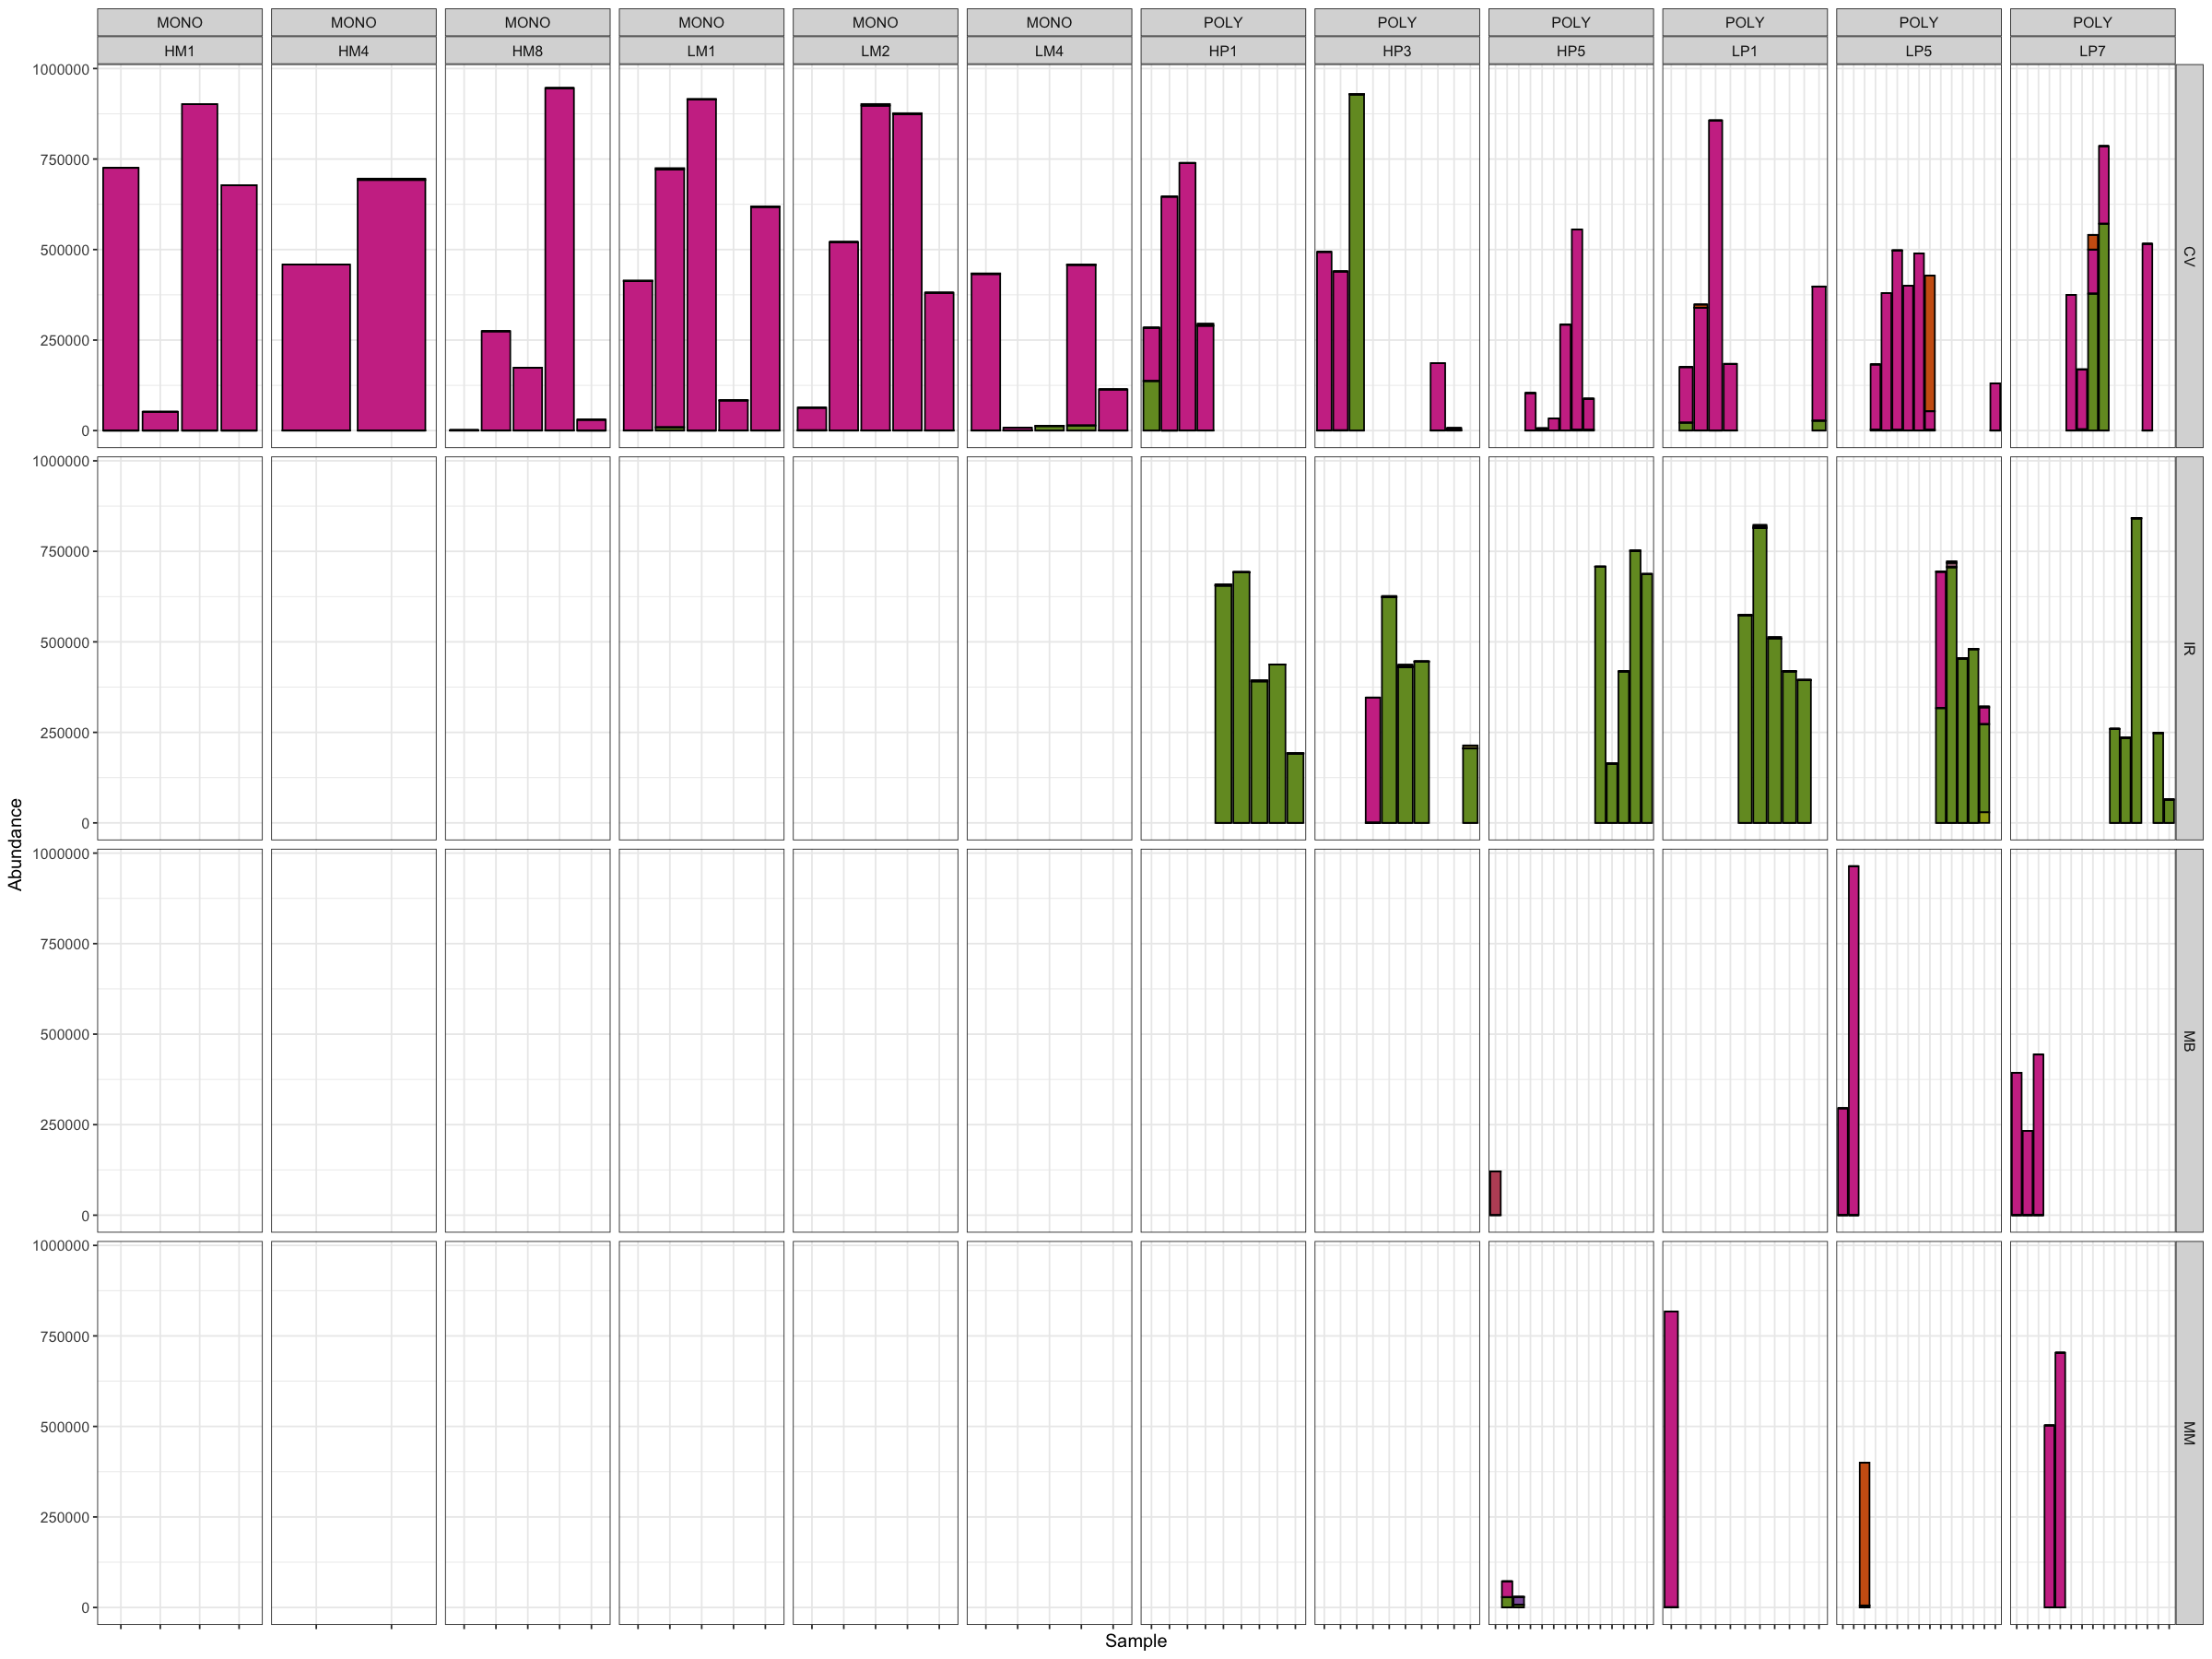

In [54]:
plot_bar(Spiro_allf, fill="OTU")+
scale_fill_manual(values=mycolors)+
theme_bw()+
facet_grid(Species~Treatment2_Diversity+Color_Bucket, scales="free_x")+
theme(legend.position = "none", text = element_text(size=12), axis.text.x = element_blank())


Can you look at abundance of surviving mussels at the end. 

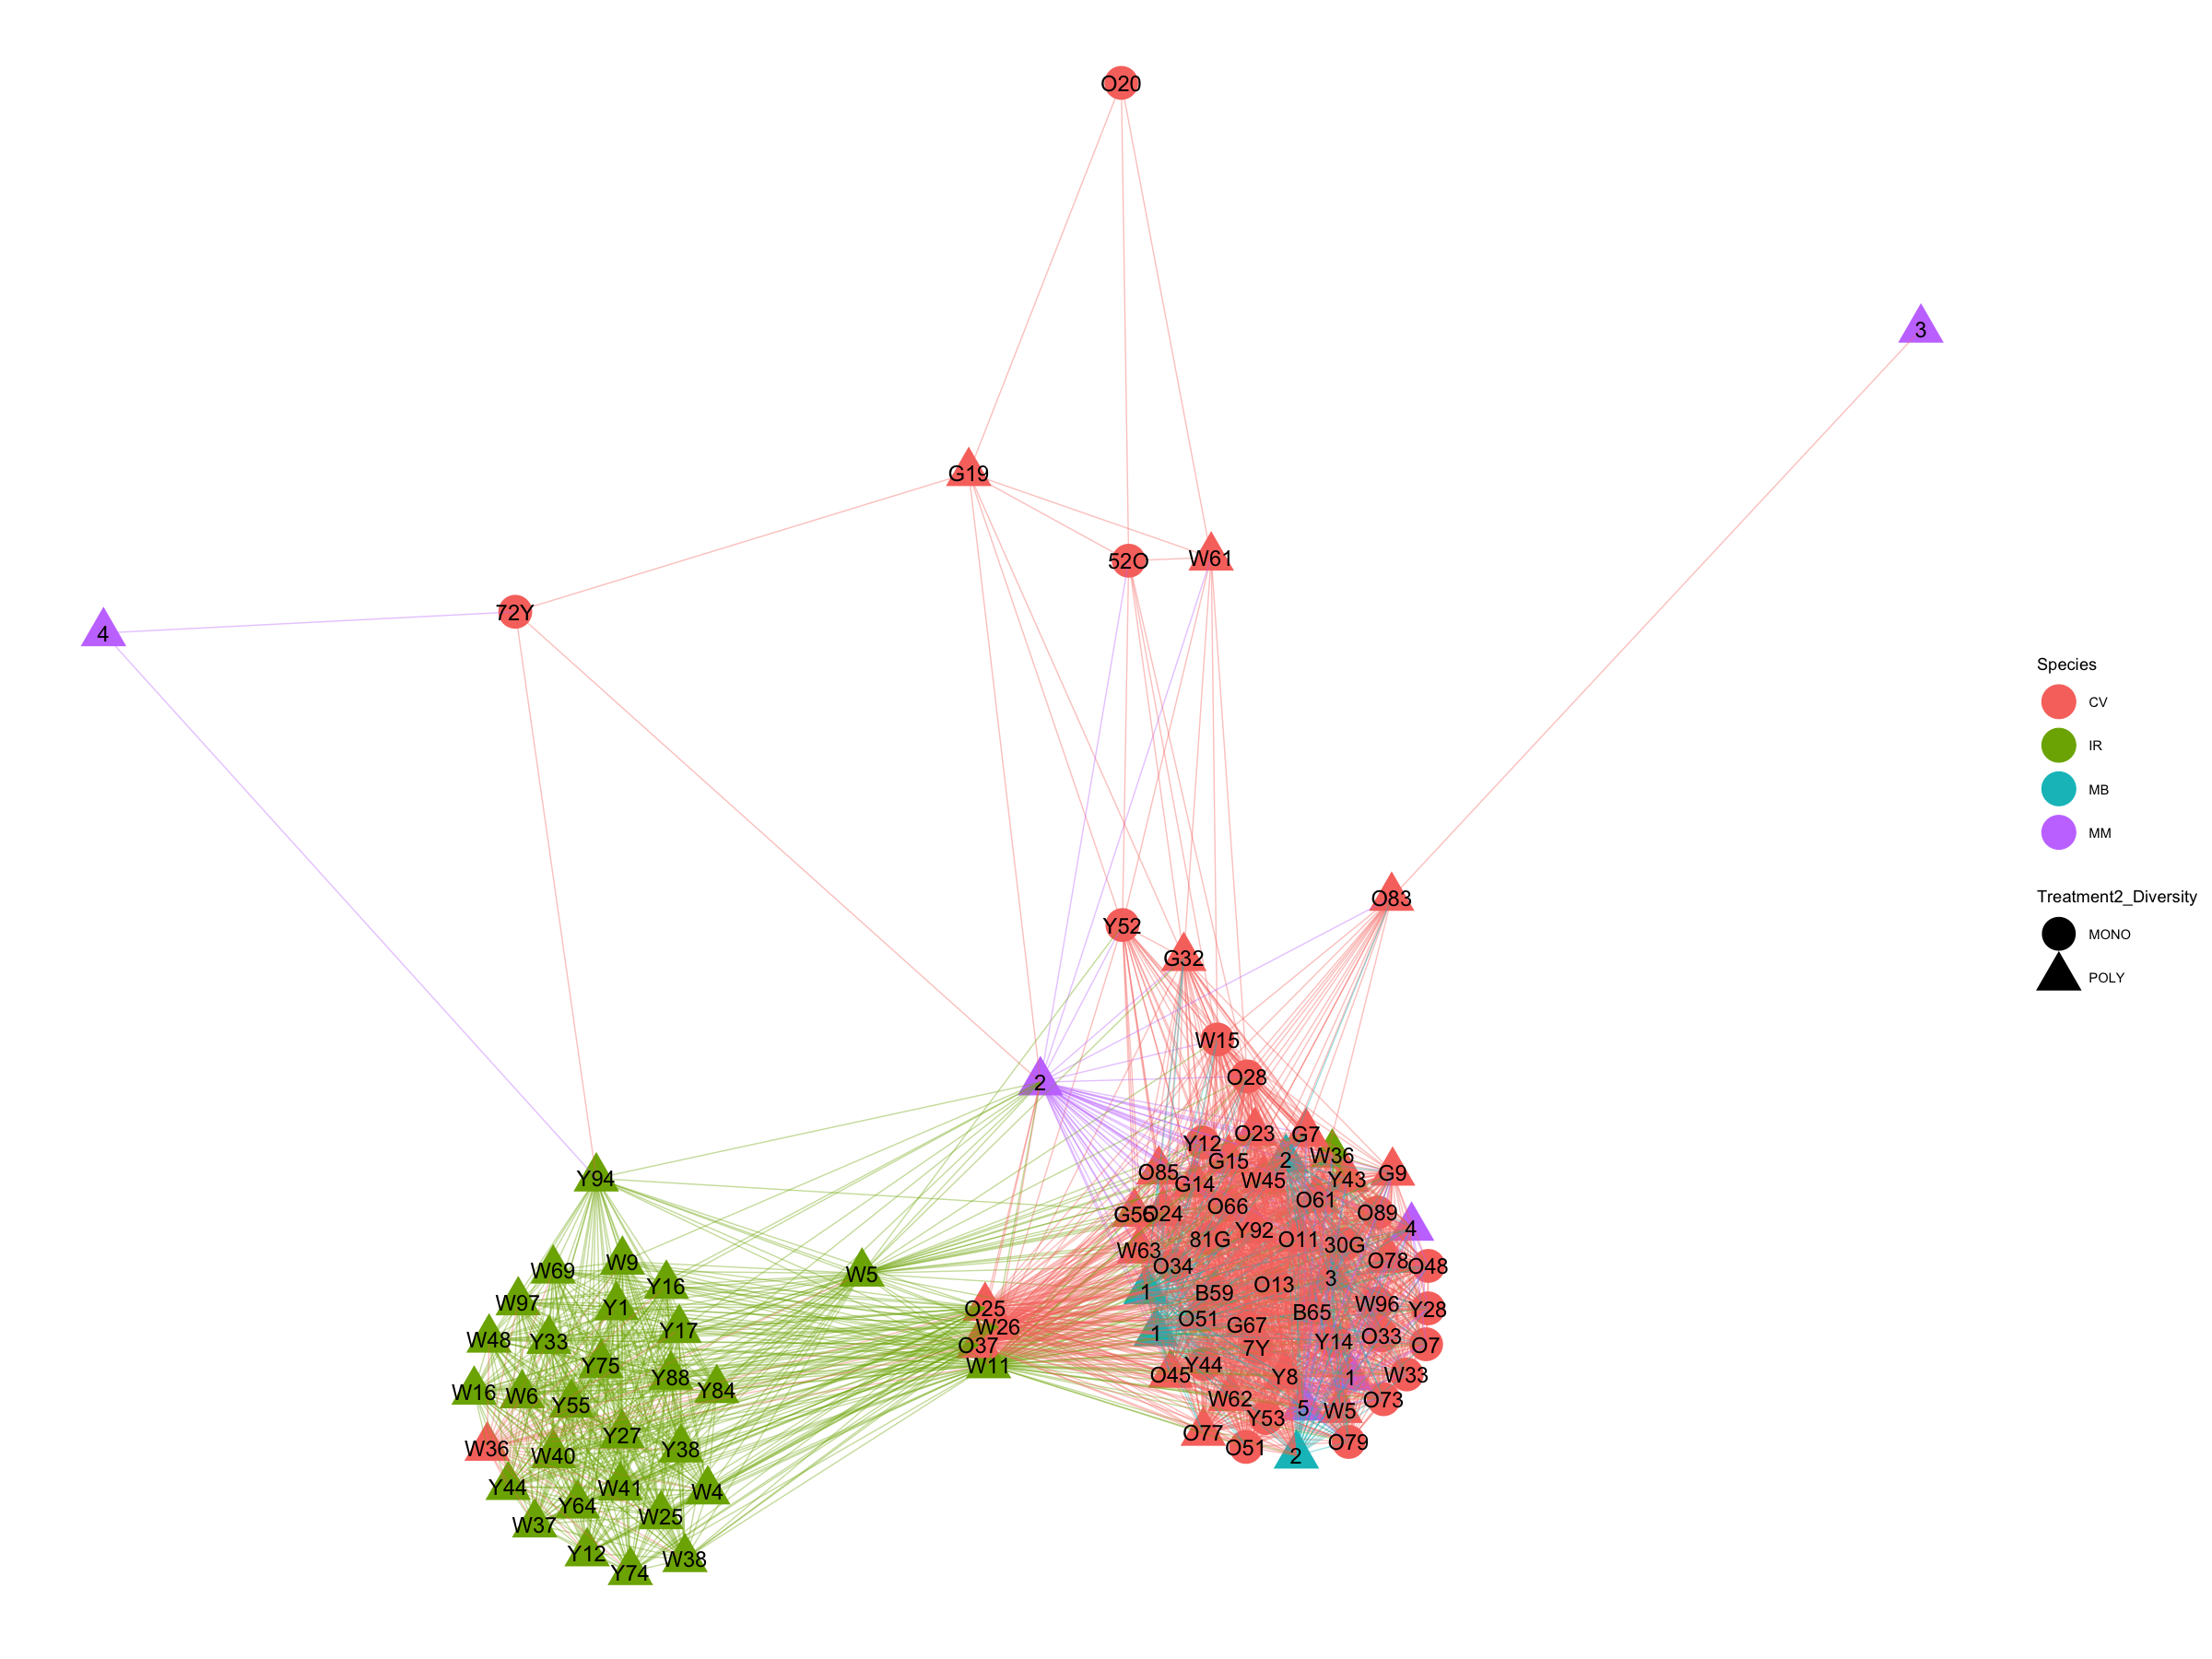

In [335]:
spnw = make_network(Spiro_all, type = "samples", distance = "bray", max.dist = 0.85)
plot_network(spnw, Spiro_all, color = "Species", shape = "Treatment2_Diversity",  line_weight = 0.4, 
    label = NULL, point_size=10)+
geom_text(mapping = aes(label = Number), size = 5) 

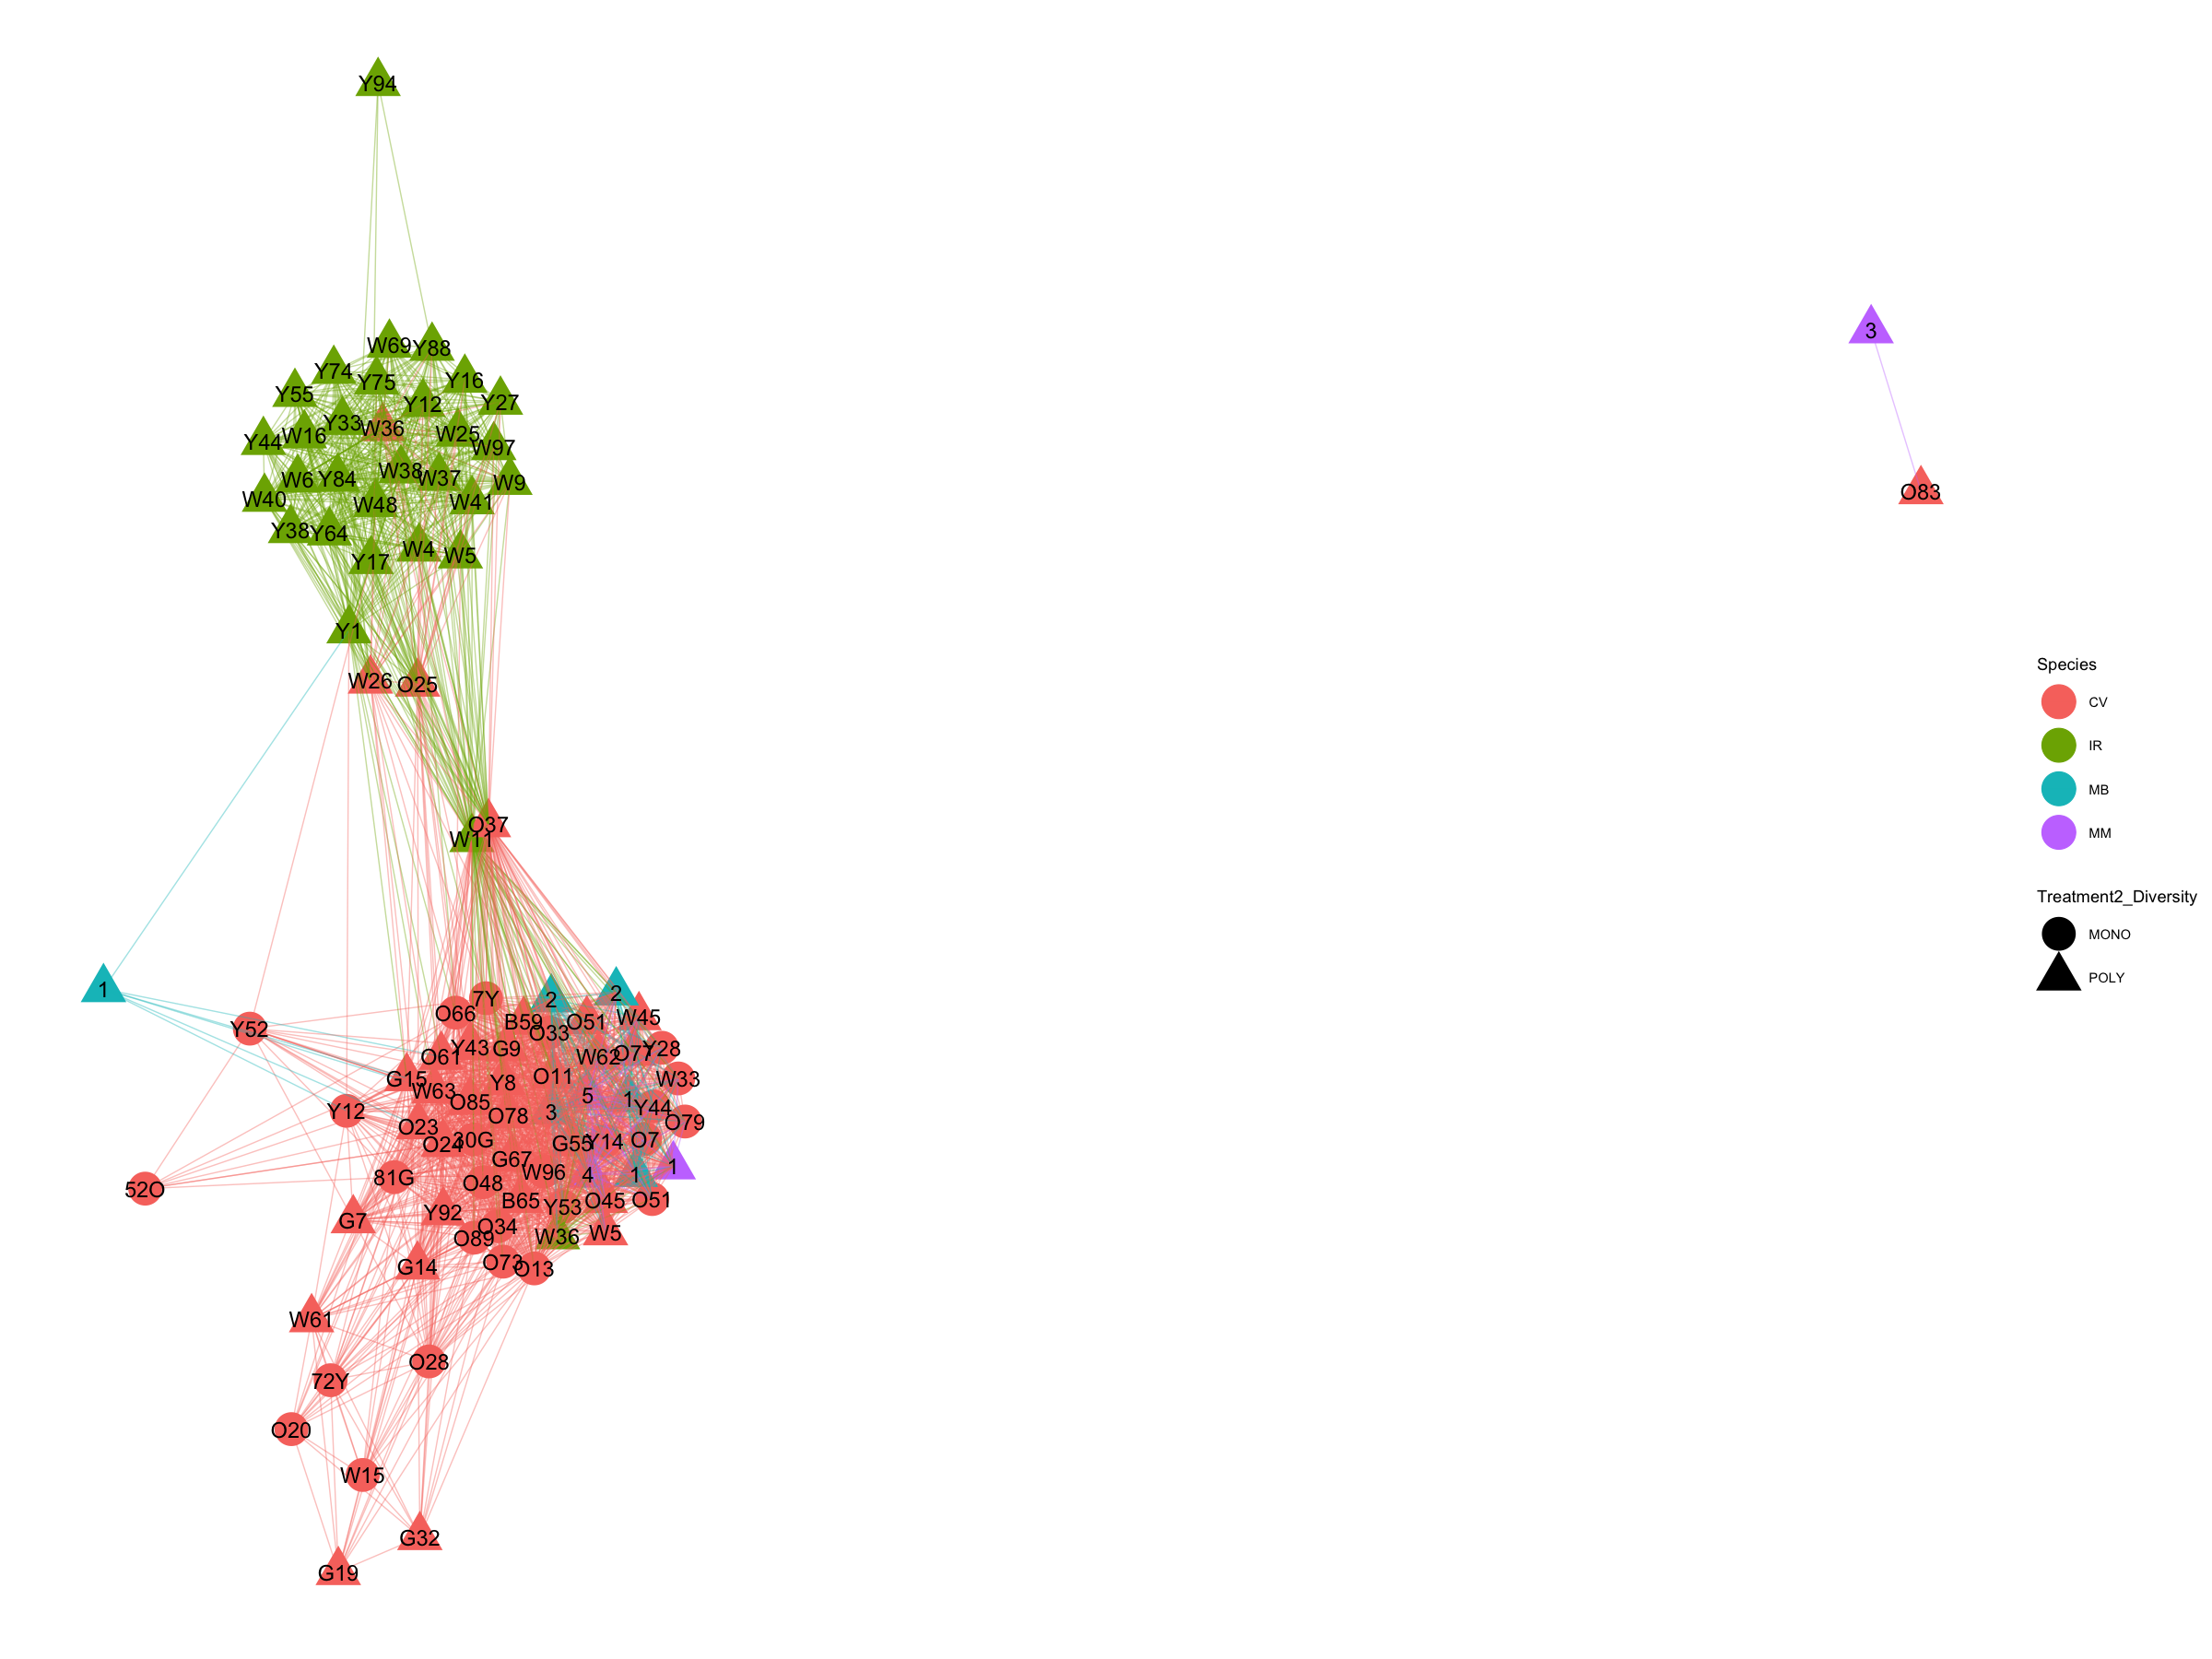

In [336]:
denw = make_network(DE, type = "samples", distance = "bray", max.dist = 0.85)
plot_network(denw, DE, color = "Species", shape = "Treatment2_Diversity",  line_weight = 0.4, 
    label = NULL, point_size=10)+
geom_text(mapping = aes(label = Number), size = 5) 

Need to do SIMPER analysis maybe? Spirochaetes are clearly driving these patterns. only a few very slight changes, division between oysters and mussels and those oysters that cluster with mussels is the same!
Main message is that CV and IR are both dominated by spirochetes, but have different strains. When co-cultured, can swap dominant strains. Clams seem to predominantly have cv-associated strain, with a few exception, including that one Pink strain, which was also found in a cv in the same bucket. 

Possible journals to send this to: 
FEMS microbiology ecology (3.675)
Aquatic Microbial ecology (2.024)
Animal Microbiome (no IF yet, split from Microbiome, OA=2k dollars but may be waived)


The dominant spirochete OTU matches 100% Spirochaete-1 from Pimentel 2020
AAGGAGGTGATCCAACCACAGCTTCCGCTACGGTCGCCTTGTTACGACTTAACCCTCCTTACCAAATCCACCTTCGGCGCATCCCCCCAAAAGGTTGGTACTGCGACTTCGGGTAAAAT CGATTCGGATGGTTTGACGGGCGGTGTGTACAAGGCTCGAGAACGCATTCACCGCGGCATGCTGATCCGCGATTACTAGTGATTCCAGCTTCATGGAGTCGAATTGCAGACTCCAATCC GAACTAAGAGTTCTTTTTTGAGATTGGCTTGGCTTCGCAGCTTAGCATCTCTTTGTAGAACCCATTGTAGCACGTGTGTAGCCCTGGACATAAGGGCCATGAGGACTTGACGTCATCCAC TCCTTCCTCCTGGTTATCCACAGGCAGTCTCCTAAGAGTTCTTCGCTTCGAAAAGCGACTAGCAACATAGGACATGGGTTGCGCTCGTTGCGGGACTTAACCCAACATTTCACAACACG AGCTGACGACAGCCATGCAGCACCTCGCCTACCGCCCCGAAGGGAAAACGACTTTCATCGTCTGTCAATAGACGTTTAAGCCCAGGTAAGGTTCTTCGCGTATCATCGAATTAAACCAC ATGCTCCACCACTTGTGCGAGCCCCCGTCAATTTCTTTGAGTTTCACACTTGCGTGCATACTACCCAGGCGGTACACTTAATGCGTTAGCTACGTTTCAAAAGAAAACTTTCGTCATCCC TTAAAGCTAGTGTACAGTGTTTACGGCTAGGACTACTGGGGTCTCTAATCCCATTTGCTCCCCTAGCTTTCGTGCCTCAGCGTCAGTCATTACCCAGTAGCTTGTCTTCACCCTTGGTGTT CCTCCTGATATCTACAGATTTCACTCCTACACCAGGAATTCCCGCTACCTCTATCTATGACTCTAGCCCAACAGTATCAGCAGCAGCTTCGTGGTTGAGCCACGAAATTTCACAACTGAC TTGATGAGCAGCCTGCGCACCCTTTACGCCCAGTGATTCCGAACAACGTTCGCCCCCTACGTATTACCGCGGCTGCTGGCACGTAGTTAGCCGGGGCTTCTTTTGCAGGTACCGTCATCT ACAGCACATTTCCTTACTGTATTATTCTTTCCTGCCGAAAGGACTTTACAACTCGAAAGCCTTCATCGTCCATGCGAAATTGCTCCGTCAGGGTTTCCCCCATTGCGGAATATTCTCAGCT GCTGCCTCCCGTAGGAGTCTGGGCCGTATCTCAGTCCCAGTGTGGCCGATCGCCCTCTCAGGCCGGCTACCTATCATCGCCTTGGTAGGCTCTTACCCTACCAACAAGCTAATAGGGGTT AGCCCTATCCTCCAGTGGTACCAACGCACCTTTTAAGTTTCCTCAATATCGGGCATTAATCACCATTACAGTGGCTATTCCCGTCTGGAGGGCAAGTTGCTAACTTCTACTCACCCGTTC GCCGCTTGCCACCCGAAGTGCTGCCGCTCGACTTGCATGCTTAAAACATCTCGCTAACGTTCGTTCTGAGCCAGAATCAAACTCTTCATCATAGAA

## Look at relationships between Spiros and growth

In [1]:
d=read.csv("~/Documents/DE_16S/DE2018_alldata.csv")
w=read.csv("~/Documents/DE_16S/Dry_Weight.csv")

In [2]:
cv=d[d$Species=="CV"& !is.na(d$Weight_post)& !is.na(d$Weight),]


In [3]:
d$Length_post=as.numeric(as.character(d$Length_post))
d$Length_pre=as.numeric(as.character(d$Length_pre))
d$Weight_change=d$Weight_post-d$Weight
d$Length_change=d$Length_post-d$Length_pre
d$Width_change=d$Width_post-d$Width_pre

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [4]:
colnames(d)

[1] "Bucket"                "Color.Number"          "Old.New"              
 [4] "Species"               "Date_initial_measure"  "Length_pre"           
 [7] "Width_pre"             "Height_pre"            "Weight"               
[10] "Mortality_Date"        "Date_FinalMeasurement" "Length_post"          
[13] "Width_post"            "Height_post"           "Weight_post"          
[16] "live_barnacles"        "dead_barnacles"        "polydora_scars"       
[19] "RFTM_Date"             "RFTM_score"            "Parasites"            
[22] "X"                     "Weight_change"         "Length_change"        
[25] "Width_change"

In [13]:
dsimp=d[c(1,2,4,23:25)]
meta_de_meas=merge(meta_de, dsimp, by.x=c("Number", "Species", "Color_Bucket"), by.y=c("Color.Number", "Species", "Bucket"))

In [19]:
write.csv(meta_de_meas, file="~/Documents/DE_16S/De2018_measurements.csv")

In [14]:
rownames(meta_de_meas)=meta_de_meas$UniqueID
meas=sample_data(meta_de_meas)
sample_data(Spiro_all)=meas

ERROR: Error in sample_data(Spiro_all) = meas: object 'Spiro_all' not found


In [344]:
rank_names(Spiro_all)[2]

[1] "Phylum"

In [345]:
Spiro_simp=tax_glom(Spiro_all, rank_names(Spiro_all)[2])
Spirodf = psmelt(Spiro_simp)
colnames(Spirodf)
NROW(Spirodf)


[1] "OTU"                  "Sample"               "Abundance"           
 [4] "Number"               "Species"              "Color_Bucket"        
 [7] "V1"                   "UniqueID"             "Experiment"          
[10] "Year"                 "Site"                 "Treatment1_Density"  
[13] "Treatment2_Diversity" "RFTM_score"           "peacrabs"            
[16] "Phase_1_DO"           "Phase_1_temp"         "Phase_2_DO"          
[19] "Phase_2_Temp"         "Overall_treatment"    "Weight_change"       
[22] "Length_change"        "Width_change"         "Kingdom"             
[25] "Phylum"

[1] 98

In [349]:
head(Spirodf)

OTU                                                                                                                                                                                                                                                            
72 TACGTAGGGGGCGAACGTTGTTCGGAATCACTGGGCGTAAAGGGTGCGCAGGCTGCTCATCAAGTCAGTTGTGAAATTTCGTGGCTCAACCACGAAGCTGCTGCTGATACTGTTGGGCTAGAGTCATAGATAGAGGTAGCGGGAATTCCTGGTGTAGGAGTGAAATCTGTAGATATCAGGAGGAACACCAAGGGTGAAGACAAGCTACTGGGTAATGACTGACGCTGAGGCACGAAAGCTAGGGGAGCAAATGGG
10 TACGTAGGGGGCGAACGTTGTTCGGAATCACTGGGCGTAAAGGGTGCGCAGGCTGCTCATCAAGTCAGTTGTGAAATTTCGTGGCTCAACCACGAAGCTGCTGCTGATACTGTTGGGCTAGAGTCATAGATAGAGGTAGCGGGAATTCCTGGTGTAGGAGTGAAATCTGTAGATATCAGGAGGAACACCAAGGGTGAAGACAAGCTACTGGGTAATGACTGACGCTGAGGCACGAAAGCTAGGGGAGCAAATGGG
23 TACGTAGGGGGCGAACGTTGTTCGGAATCACTGGGCGTAAAGGGTGCGCAGGCTGCTCATCAAGTCAGTTGTGAAATTTCGTGGCTCAACCACGAAGCTGCTGCTGATACTGTTGGGCTAGAGTCATAGATAGAGGTAGCGGGAATTCCTGGTGTAGGAGTGAAATCTGTAGATATCAGGAGGAACACCAAGGGTGAAGACAAGCTACTGGGTAATGACTGACGCTGAGGCACGAAAGCTAGGGGAGCAAATGGG
47 TACGTAGGGGGCGAACGTTGTTCGGAATCACTGGGCGTAAAGGGTGCGCAGGCTGCTCATCAAGTCAGTTGTGAAATTTCGTGGCTCAACCACGAAGCTGCTGCTGATACTGTTGGGCTAGAGTCATAGATAGAGGTAGCGGGAATTCCTGGTGTAGGAGTGAAATCTGTAGATATCAGGAGGAACACCAAGGGTGAAGACAAGCTACTGGGTAATGACTGACGCTGAGGCACGAAAGCTAGGGGAGCAAATGGG
3  TACGTAGGGGGCGAACGTTGTTCGGAATCACTGGGCGTAAAGGGTGCGCAGGCTGCTCATCAAGTCAGTTGTGAAATTTCGTGGCTCAACCACGAAGCTGCTGCTGATACTGTTGGGCTAGAGTCATAGATAGAGGTAGCGGGAATTCCTGGTGTAGGAGTGAAATCTGTAGATATCAGGAGGAACACCAAGGGTGAAGACAAGCTACTGGGTAATGACTGACGCTGAGGCACGAAAGCTAGGGGAGCAAATGGG
52 TACGTAGGGGGCGAACGTTGTTCGGAATCACTGGGCGTAAAGGGTGCGCAGGCTGCTCATCAAGTCAGTTGTGAAATTTCGTGGCTCAACCACGAAGCTGCTGCTGATACTGTTGGGCTAGAGTCATAGATAGAGGTAGCGGGAATTCCTGGTGTAGGAGTGAAATCTGTAGATATCAGGAGGAACACCAAGGGTGAAGACAAGCTACTGGGTAATGACTGACGCTGAGGCACGAAAGCTAGGGGAGCAAATGGG
   Sample                    Abundance Number Species Color_Bucket V1 
72 2018__LOW_POLY_LP52_MB    965367.5  2      MB      LP5          213
10 2018__HIGH_MONO_HM8Y28_CV 946883.7  Y28    CV      HM8          126
23 2018__HIGH_POLY_HP3W36_CV 930153.3  W36    CV      HP3          138
47 2018__LOW_MONO_LM1O51_CV  919990.8  O51    CV      LM1          158
3  2018__HIGH_MONO_HM1W33_CV 902191.6  W33    CV      HM1          114
52 2018__LOW_MONO_LM2O7_CV   901998.9  O7     CV      LM2          161
   UniqueID                  Experiment Year ⋯ Phase_1_DO Phase_1_temp
72 2018__LOW_POLY_LP52_MB    Lab18      2018 ⋯                        
10 2018__HIGH_MONO_HM8Y28_CV Lab18      2018 ⋯                        
23 2018__HIGH_POLY_HP3W36_CV Lab18      2018 ⋯                        
47 2018__LOW_MONO_LM1O51_CV  Lab18      2018 ⋯                        
3  2018__HIGH_MONO_HM1W33_CV Lab18      2018 ⋯                        
52 2018__LOW_MONO_LM2O7_CV   Lab18      2018 ⋯                        
   Phase_2_DO Phase_2_Temp Overall_treatment Weight_change Length_change
72                                             NA              NA       
10                                           1.38          -12.23       
23                                           6.25            0.80       
47                                           7.45           -0.85       
3                                            5.04            0.36       
52                                           5.39            8.44       
   Width_change Kingdom  Phylum       
72   NA         Bacteria Spirochaetota
10 2.83         Bacteria Spirochaetota
23 4.16         Bacteria Spirochaetota
47 2.58         Bacteria Spirochaetota
3  0.31         Bacteria Spirochaetota
52 4.69         Bacteria Spirochaetota

Warning message:
“Removed 23 rows containing missing values (geom_point).”
Warning message:
“Removed 23 rows containing missing values (geom_text).”


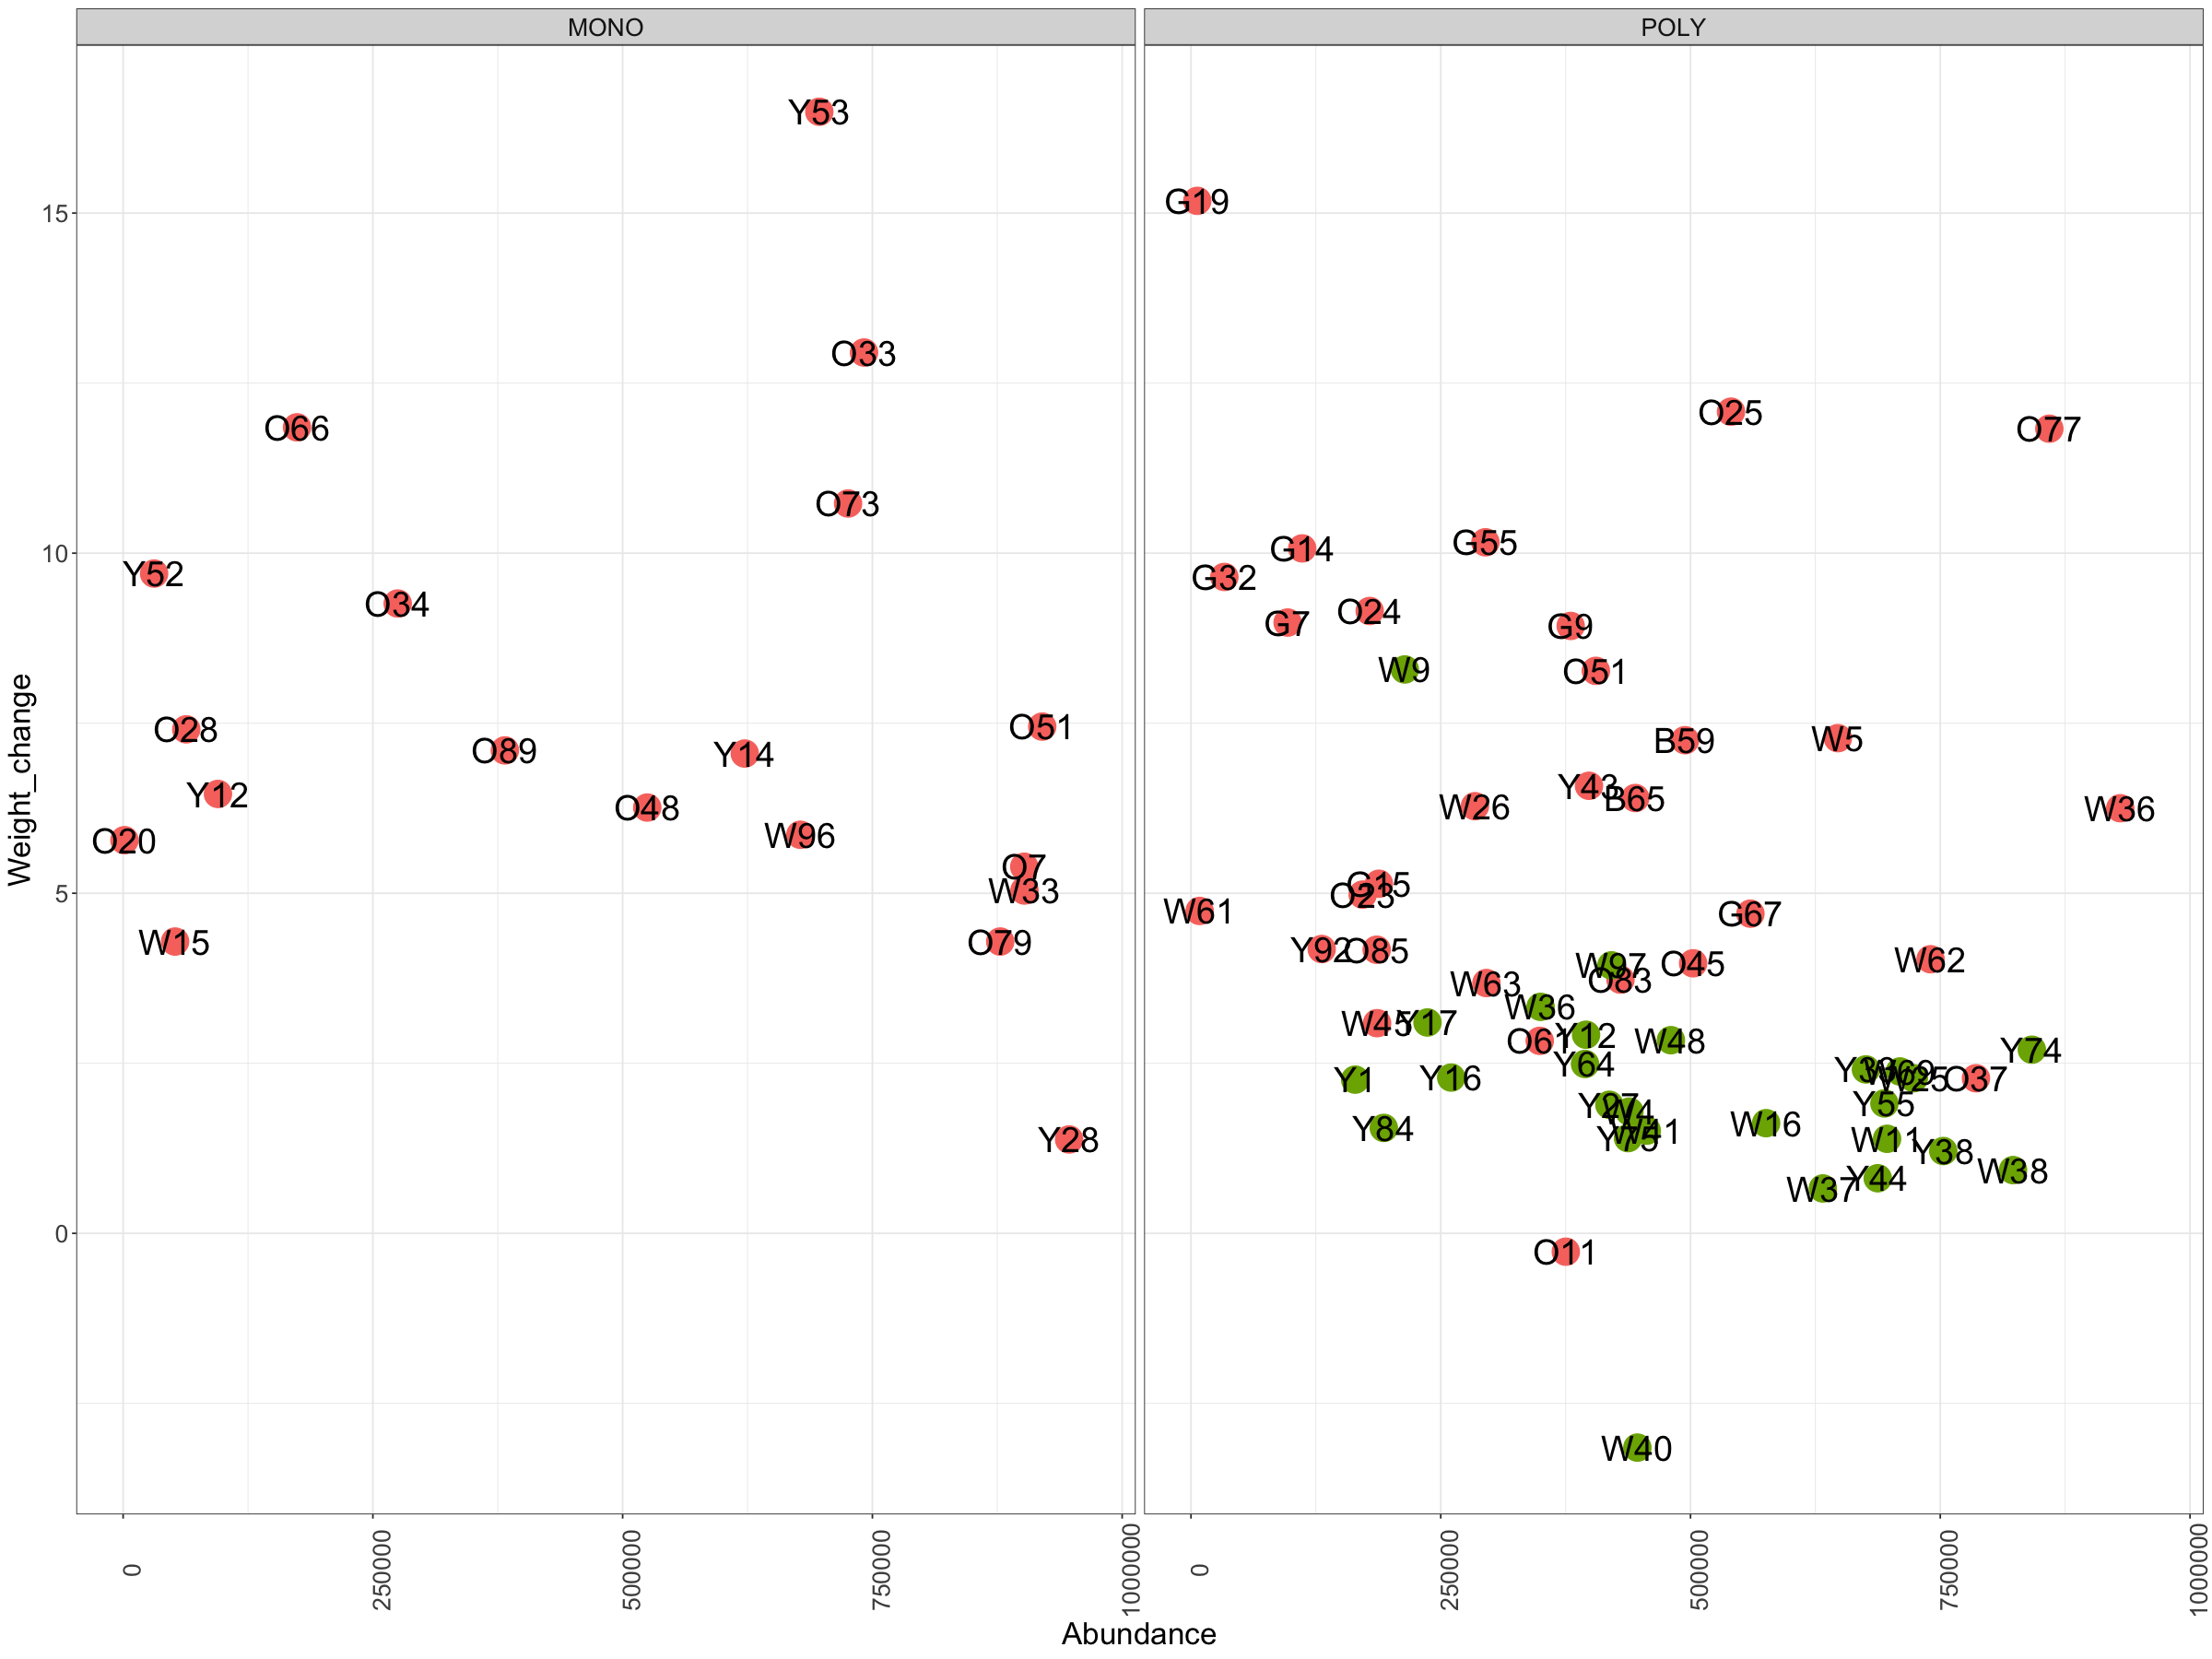

In [354]:
ggplot(Spirodf, aes(x=Abundance, y=Weight_change, color=Species))+
geom_point(aes(fill=Species), size=8)+
facet_grid(.~Treatment2_Diversity)+
theme_bw()+
geom_text(aes(label=Number), color="black", size=8)+
theme(legend.position = "none", text = element_text(size=20), axis.text.x = element_text(angle = 90))
